Variable | Description | Required For
TAVG | Avg. monthly temp | All models
PRCP | Monthly precipitation | All models
AWND / WSFG | Wind speed (U.S. / Canada) | Wind forecasting
SNOW | Monthly snow | Solar/wind impact
TSUN / PSUN (U.S.) | Sunshine duration/percent | Solar forecasting
RHAV (U.S.) | Relative humidity | Solar efficiency
CLDD, HTDD | Degree days (cooling/heating) | Energy demand modeling

# **Cross-Border Monthly Weather Forecasting for Wind Energy**
## **A Dual-Region Machine Learning Approach**

---

## **1. Project Context & Motivation**

The global shift toward renewable energy has led to an increased reliance on **wind energy** as a sustainable and clean power source. However, weather variability—particularly in **wind speed**, **temperature**, and **precipitation**—poses significant challenges to:

- Maximizing wind energy production
- Maintaining operational efficiency
- Planning maintenance and infrastructure needs

This project focuses on building **machine learning-based predictive models** for key weather variables critical to wind energy:

- **Average Wind Speed (AWND)**
- **Average Temperature (TAVG)**
- **Total Precipitation (PRCP)**

### Use Case Benefits for Wind Energy Stakeholders:

- **Turbine placement** and site evaluation
- **Monthly energy yield estimation**
- **Maintenance scheduling**
- **Grid load balancing and infrastructure planning**

Forecast models are trained using high-quality historical data from **NOAA’s Global Historical Climatology Network (GHCN)**, particularly the **Global Summary of the Month (GSOM)** dataset.

### Regions of Interest:

- **Beach Corner (Edmonton, Alberta, Canada)**  
  Cold, high-wind continental climate with strong onshore wind potential.

- **Raleigh-Durham International Airport (North Carolina, USA)**  
  Humid subtropical climate; important for both **offshore wind** and hybrid **solar-wind** projects.

---

## **2. Chosen Topic from Project Guidelines**

**Topic 14: Weather Forecasting**  
> _"Develop a weather forecasting model to predict temperature, precipitation, and other weather variables for specific locations and timeframes."_

---

## **3. Why These Locations?**

### **Beach Corner, Edmonton – Alberta, Canada**

- **Climate:** Cold winters, short summers, variable winds, high seasonal contrast
- **Wind Energy Role:**
  - Alberta is a leading province in wind energy development.
  - Strong wind corridors and increasing renewable investment.
- **Use Case:**
  - Extreme temperatures impact turbine performance.
  - Wind forecasting aids in estimating **capacity factor fluctuations**.
  - Precipitation forecasting (especially snow) improves **maintenance planning**.

### **Raleigh-Durham International Airport – North Carolina, USA**

- **Climate:** Mild winters, hot/humid summers, frequent tropical storms
- **Wind Energy Role:**
  - Coastal proximity supports **offshore wind development**.
  - Inland hybrid energy systems (solar + wind) gaining momentum.
- **Use Case:**
  - Storm forecasts aid **turbine safety protocols**.
  - Humidity and rain influence turbine lifespan and electrical systems.
  - Seasonal wind variation offers **year-round generation potential**.

---

## **4. Why Monthly Forecasting?**

Monthly forecasting provides a strategic planning tool, balancing data availability with forecasting utility.

### Benefits:

- **Energy Yield Forecasting:**  
  Monthly wind trends estimate potential **power generation**.

- **Maintenance Scheduling:**  
  Plan inspections and repairs during low wind or mild weather months.

- **Financial Planning & Risk Assessment:**  
  Inputs for **power purchase agreements (PPAs)**, insurance planning, and grid forecasts.

- **Seasonal Strategy Alignment:**  
  Support for **long-term planning** (e.g., upgrades, production goals).

The **GSOM dataset** supports this approach through decades of **quality-controlled, standardized** monthly weather summaries.

---

## **5. Business Use Case for Wind Energy Developers**

### **Target Users:**

- Wind farm developers
- Turbine manufacturers
- Grid operators & energy planners
- Renewable energy consultants

### **Problems Addressed:**

- **Reduce Turbine Downtime:**  
  Use temperature and wind trends for proactive maintenance planning.

- **Optimize Site Evaluation:**  
  Identify regions and months with **optimal wind potential**.

- **Improve Production Forecasting:**  
  Support energy production planning and **hybrid energy integration**.

- **Enable Financial Planning:**  
  Risk analysis for **insurance**, **PPA contracts**, and **budgeting**.

---

## **6. Project Goals**

### **Data Processing & EDA:**

- Clean and preprocess **GSOM data**
- Engineer **lag-based features** and explore seasonal trends

### **Modeling Approach:**

- Build separate models for:
  - **TAVG** (Temperature)
  - **PRCP** (Precipitation)
  - **AWND** (Wind Speed)
- Compare algorithms:
  - Random Forest
  - MLP
  - SVR
  - XGBoost

### **Model Evaluation:**

- Metrics:
  - **RMSE**
  - **MAE**
  - **R²**
  - **MAPE**

### **Forecasting Tool (Web App):**

- **Dash + Plotly** interface
- User-selectable:
  - **Location**
  - **Month**
- Features:
  - Interactive graphs
  - Time series outputs
  - Downloadable insights

### **Deployment & Access:**

- Hosted publicly (e.g., Render, Heroku)
- GitHub repo for code, notebooks, and documentation

---

## **7. Deliverables**

- Cleaned **GSOM datasets** for both regions
- Feature-engineered **training/test sets**
- Trained ML models with performance metrics
- **Interactive Dash app**
- Full documentation:
  - Technical write-up
  - Business relevance
- **Public GitHub repository**

---

## **8. Problem Statement**

Accurately forecasting monthly **wind speed**, **temperature**, and **precipitation** is critical to the development, operation, and long-term planning of wind energy infrastructure.

Despite the availability of global weather data, most tools focus on daily or real-time forecasts, which are not optimal for strategic planning.

This project aims to fill that gap by:

- Providing **location-specific monthly forecasts**
- Using machine learning on **freely available historical datasets**
- Delivering insights tailored for **wind energy stakeholders**

---

## **9. Hypothesis Generation**

### **Primary Hypotheses:**

| Hypothesis | Rationale |
|-----------|-----------|
| **H1**: Monthly wind speed (AWND) follows seasonal patterns. | Captures predictable gust/lull cycles affecting turbine yield. |
| **H2**: Temperature (TAVG) affects turbine efficiency and wind patterns. | Extreme heat/cold changes air density and affects turbine performance. |
| **H3**: Precipitation (PRCP) reflects storm activity that influences wind speed. | Storms may increase wind but limit turbine operation. |
| **H4**: Features like WSFG (wind gust), TMAX (max temp), and DPxx (rain days) improve forecast accuracy. | Serve as **early indicators** of weather anomalies. |

### **Secondary Hypotheses:**

| Hypothesis | Rationale |
|-----------|-----------|
| **H5**: Prediction accuracy will differ between Canada and the U.S. stations. | Different climate regimes and feature availability. |
| **H6**: U.S. forecasts may be more accurate due to additional features (e.g., humidity, sunshine, soil temperature). | More features enhance model learning and fine-tuning. |

---

## **10. Exploratory Goals**

- Rank **feature importance** for each target variable (TAVG, PRCP, AWND)
- Assess the value of **lag features** and **rolling averages**
- Explore **regional differences** in wind speed seasonality
- Engineer **threshold-based indicators** (e.g., wind over/under operational limits)
- Handle missing and skewed values through **robust preprocessing techniques**

---


### IMPORTS

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor



In [61]:
df = pd.read_csv('../data/gsom_sample_csv.csv')  

### Format display

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 
print(df.head().to_string())

       STATION     DATE  LATITUDE  LONGITUDE  ELEVATION                                         NAME  ADPT ADPT_ATTRIBUTES  ASLP ASLP_ATTRIBUTES  ASTP ASTP_ATTRIBUTES  AWBT AWBT_ATTRIBUTES  AWND AWND_ATTRIBUTES  CDSD CDSD_ATTRIBUTES   CLDD CLDD_ATTRIBUTES  DP01 DP01_ATTRIBUTES  DP10 DP10_ATTRIBUTES  DP1X DP1X_ATTRIBUTES  DSND DSND_ATTRIBUTES  DSNW DSNW_ATTRIBUTES  DT00 DT00_ATTRIBUTES  DT32 DT32_ATTRIBUTES  DX32 DX32_ATTRIBUTES  DX70 DX70_ATTRIBUTES  DX90 DX90_ATTRIBUTES  DYFG  DYFG_ATTRIBUTES  DYHF  DYHF_ATTRIBUTES        DYNT DYNT_ATTRIBUTES        DYSD DYSD_ATTRIBUTES        DYSN DYSN_ATTRIBUTES  DYTS  DYTS_ATTRIBUTES        DYXP DYXP_ATTRIBUTES        DYXT DYXT_ATTRIBUTES  EMNT EMNT_ATTRIBUTES  EMSD EMSD_ATTRIBUTES  EMSN EMSN_ATTRIBUTES  EMXP EMXP_ATTRIBUTES  EMXT EMXT_ATTRIBUTES   HDSD HDSD_ATTRIBUTES  HN01 HN01_ATTRIBUTES  HN02 HN02_ATTRIBUTES  HN03 HN03_ATTRIBUTES  HN04 HN04_ATTRIBUTES   HTDD HTDD_ATTRIBUTES  HX01 HX01_ATTRIBUTES  HX02 HX02_ATTRIBUTES  HX03 HX03_ATTRIBUTES  HX04

In [63]:

# Convert everything to string
df_str = df.head().astype(str)

# Set desired width for each column (optional tweak per your data)
col_width = 20  # or tweak per column if needed

# Center each column's contents
df_centered = df_str.applymap(lambda x: x.center(col_width))

# Center the column headers too
df_centered.columns = [col.center(col_width) for col in df_centered.columns]

# Print the nicely formatted table
print(df_centered.to_string(index=False))


      STATION                DATE               LATITUDE            LONGITUDE            ELEVATION                                      NAME                 ADPT           ADPT_ATTRIBUTES            ASLP           ASLP_ATTRIBUTES            ASTP           ASTP_ATTRIBUTES            AWBT           AWBT_ATTRIBUTES            AWND           AWND_ATTRIBUTES            CDSD           CDSD_ATTRIBUTES            CLDD           CLDD_ATTRIBUTES            DP01           DP01_ATTRIBUTES            DP10           DP10_ATTRIBUTES            DP1X           DP1X_ATTRIBUTES            DSND           DSND_ATTRIBUTES            DSNW           DSNW_ATTRIBUTES            DT00           DT00_ATTRIBUTES            DT32           DT32_ATTRIBUTES            DX32           DX32_ATTRIBUTES            DX70           DX70_ATTRIBUTES            DX90           DX90_ATTRIBUTES            DYFG           DYFG_ATTRIBUTES            DYHF           DYHF_ATTRIBUTES            DYNT           DYNT_ATTRIBUTES            DYS

C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\753125296.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_centered = df_str.applymap(lambda x: x.center(col_width))


### Select Important features from data set and rename them according to the documentation

In [64]:
# Select the features
features = ['DATE', 'STATION', 'TMAX', 'TMIN', 'TAVG', 'AWND', 'PRCP', 'ADPT', 'RHAV', 'ASLP']
df_selected = df[features]

# Rename columns to more readable names
df_selected = df_selected.rename(columns={
    'DATE': 'date',
    'STATION': 'station_id',
    'TMAX': 'max_temperature',
    'TMIN': 'min_temperature',
    'TAVG': 'avg_temperature',
    'AWND': 'avg_wind_speed',
    'PRCP': 'total_precipitation',
    'ADPT': 'avg_dew_point',
    'RHAV': 'avg_relative_humidity',
    'ASLP': 'avg_sea_level_pressure'
})


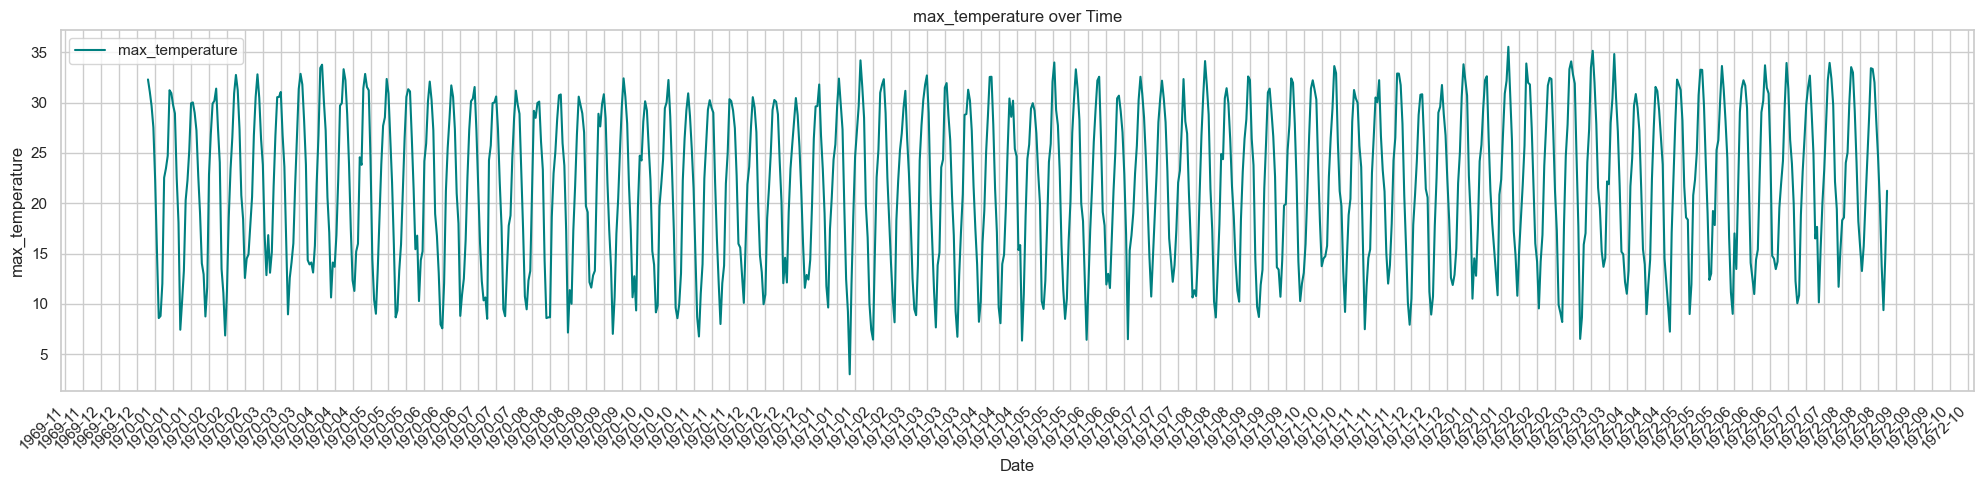

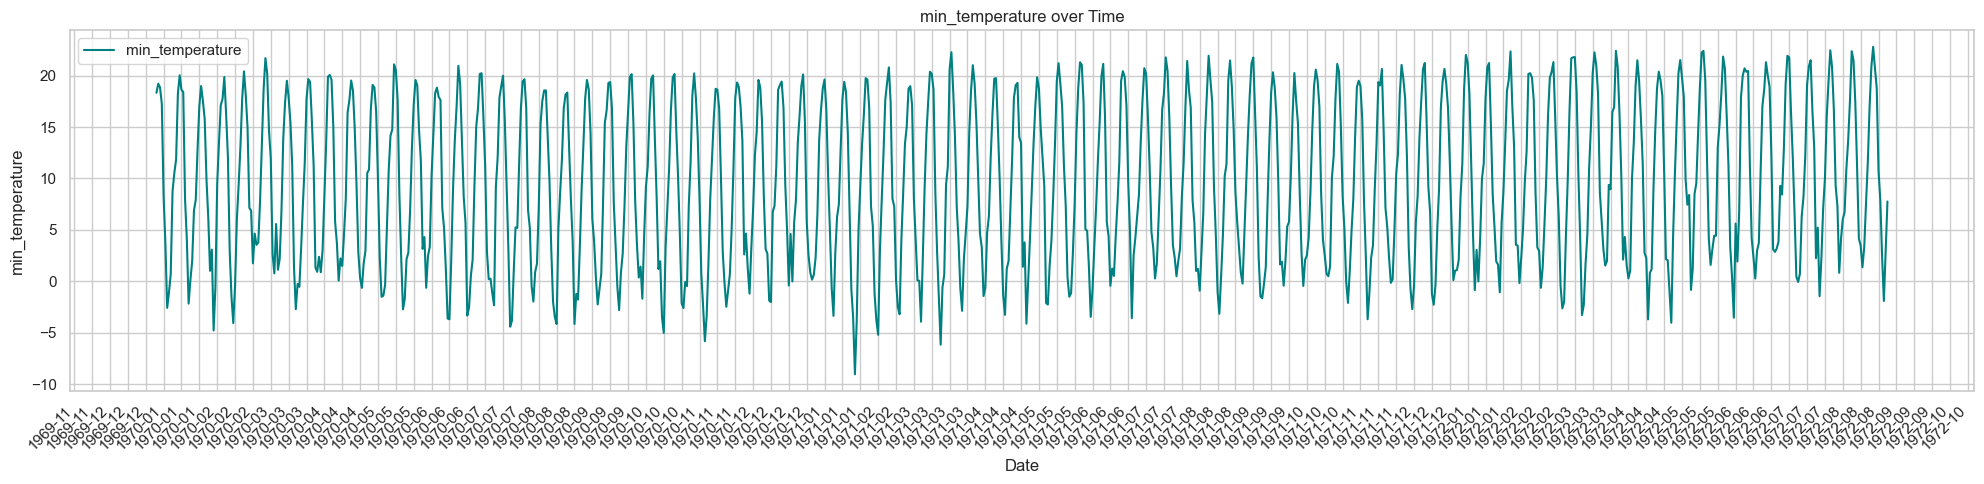

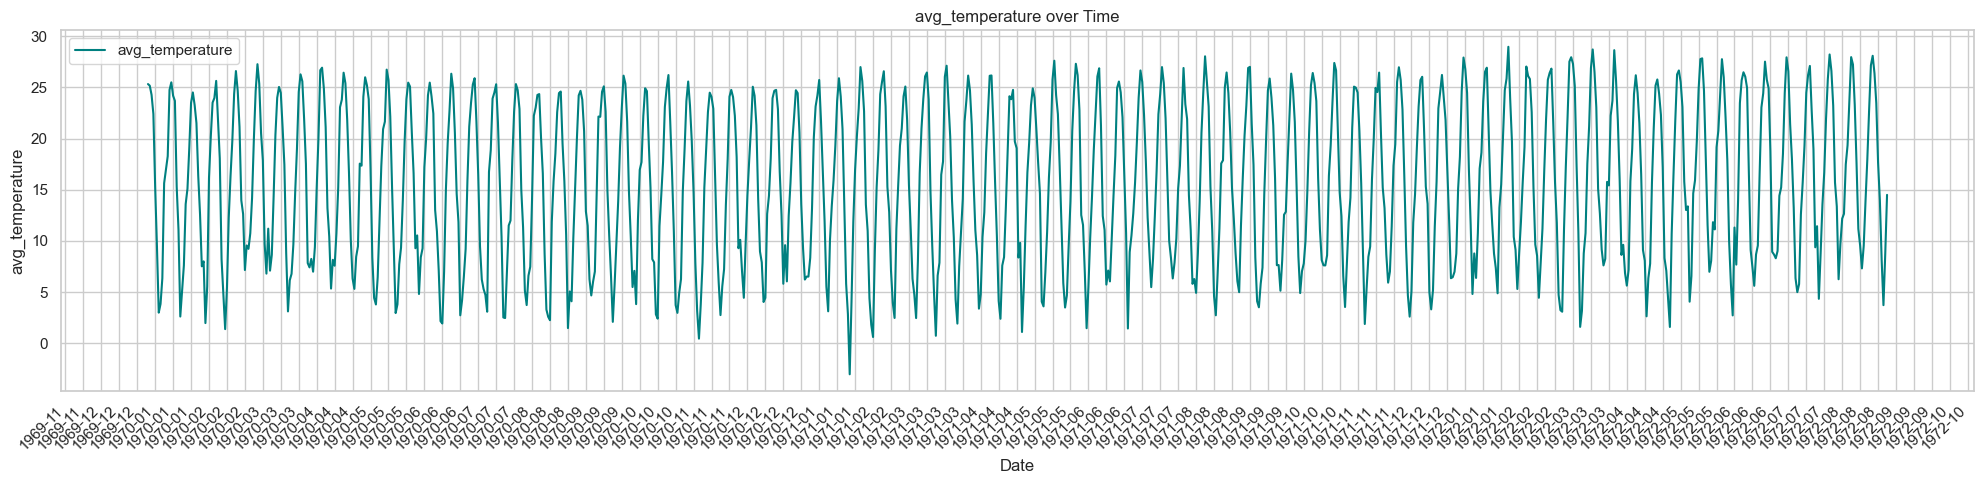

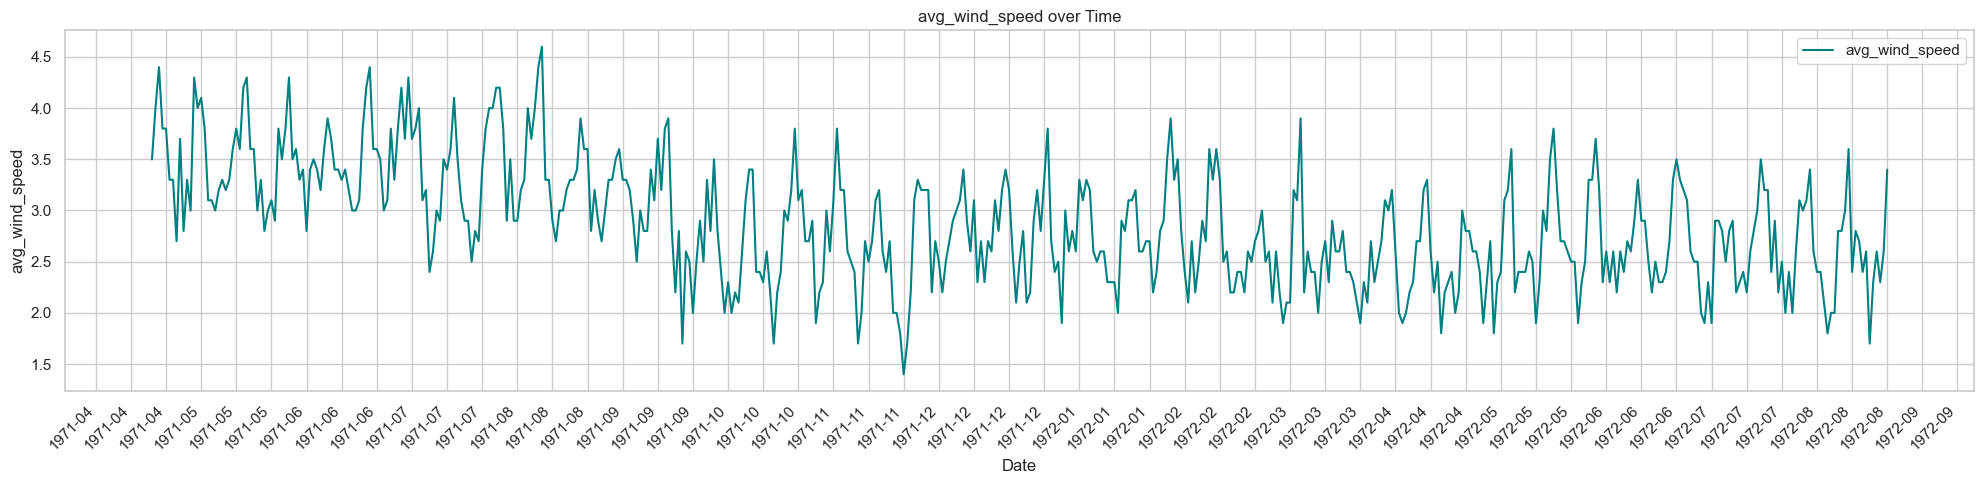

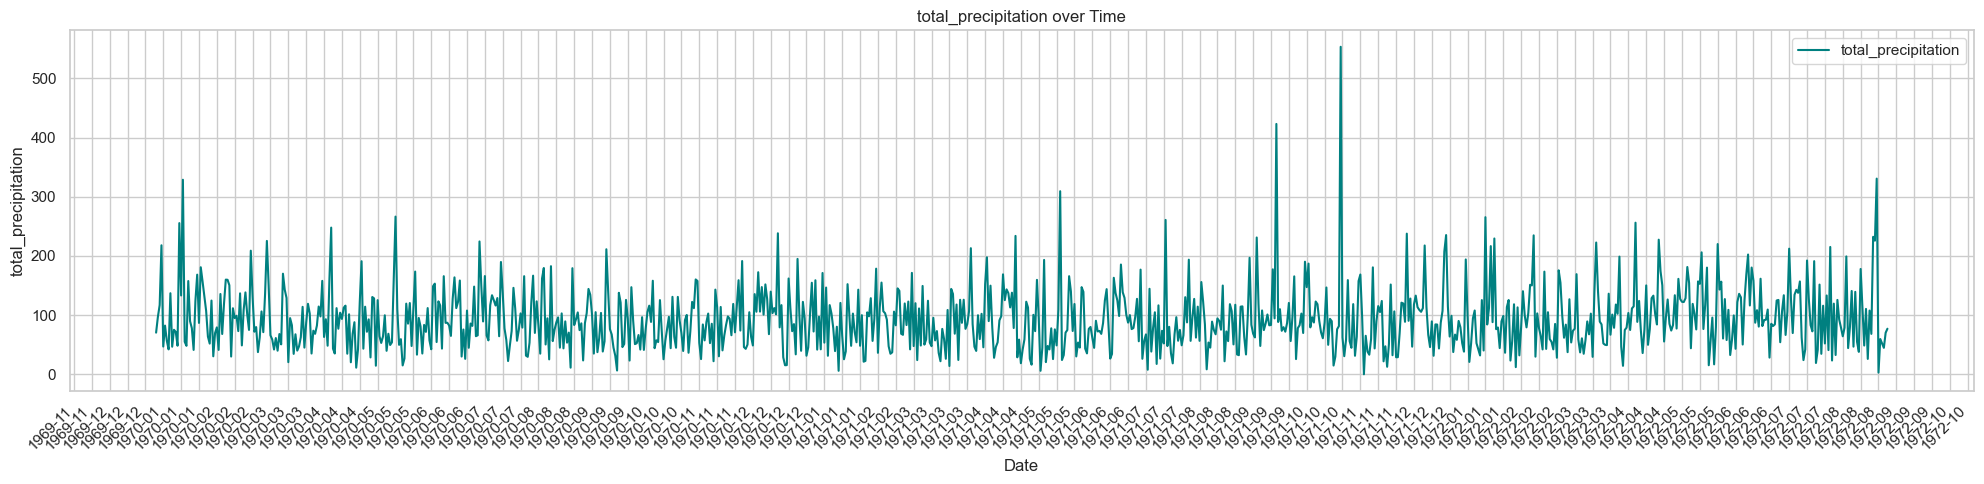

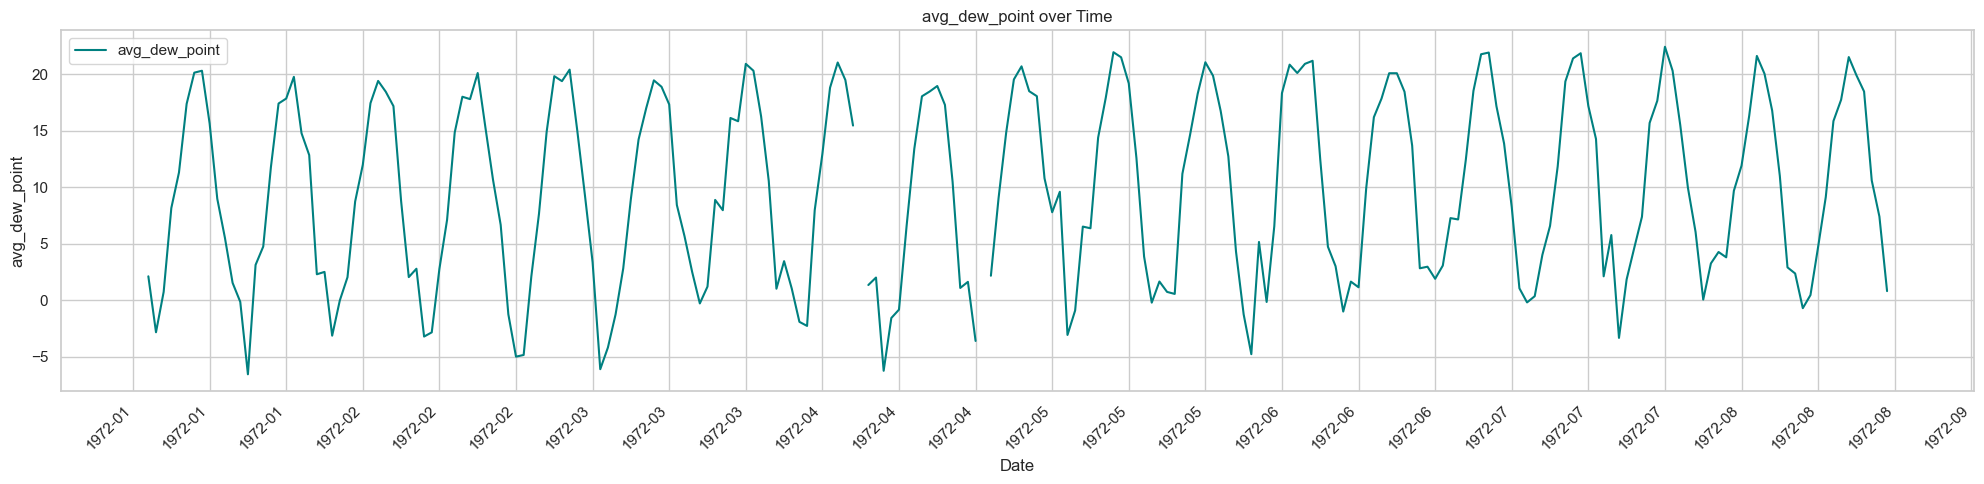

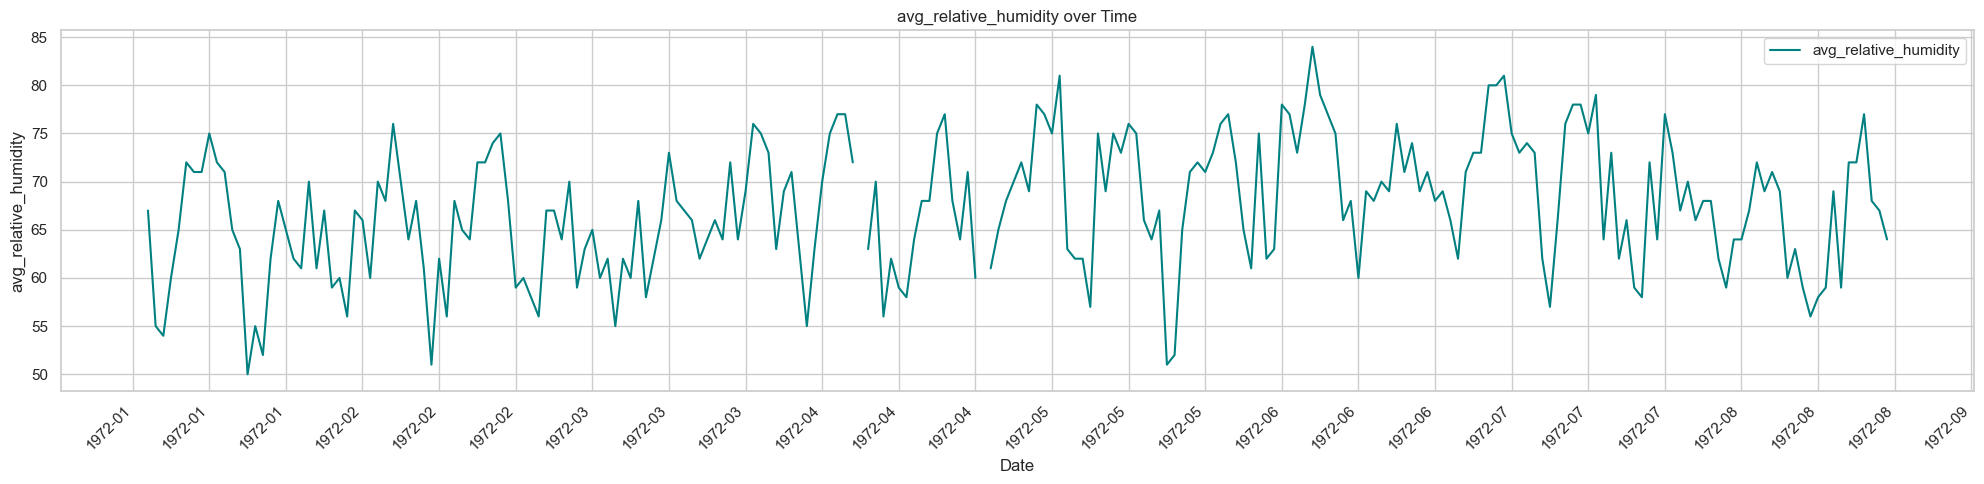

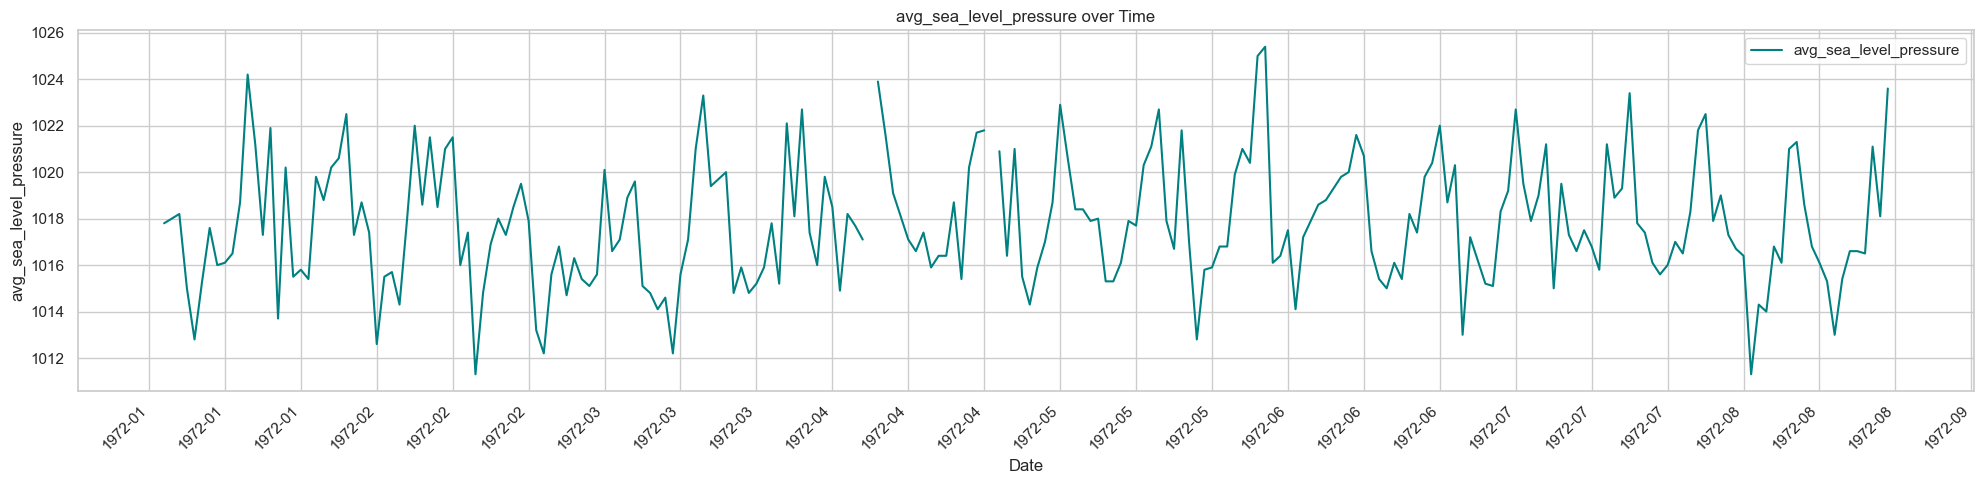

In [65]:
#loop through the features and plot
for feature in df_selected.columns:
    if feature != 'date' and feature != 'station_id':  
        plt.figure(figsize=(20, 5))  
        plt.plot(df_selected['date'], df_selected[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

### K-Nearest Neighbors (KNN) to predict missing values.

In [66]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Remove 'date' and 'station_id' for imputation
df_selected_numeric = df_selected.drop(columns=['date', 'station_id'])

# Perform imputation
df_selected_imputed = imputer.fit_transform(df_selected_numeric)

# Convert the imputed data back into a DataFrame
df_imputed = pd.DataFrame(df_selected_imputed, columns=df_selected_numeric.columns)

# Add the 'date' column back to the DataFrame
df_imputed['date'] = df_selected['date'].reset_index(drop=True)

### Graph all columns to help understand data and look for patterns

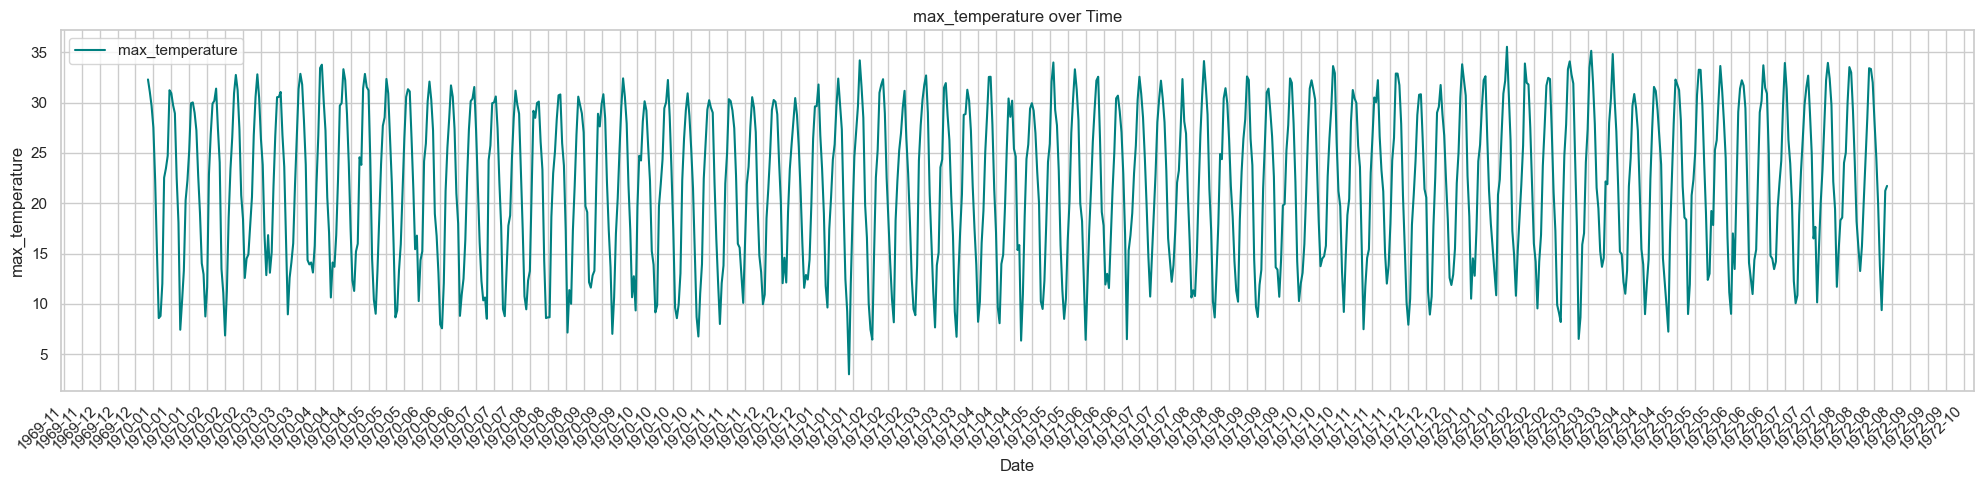

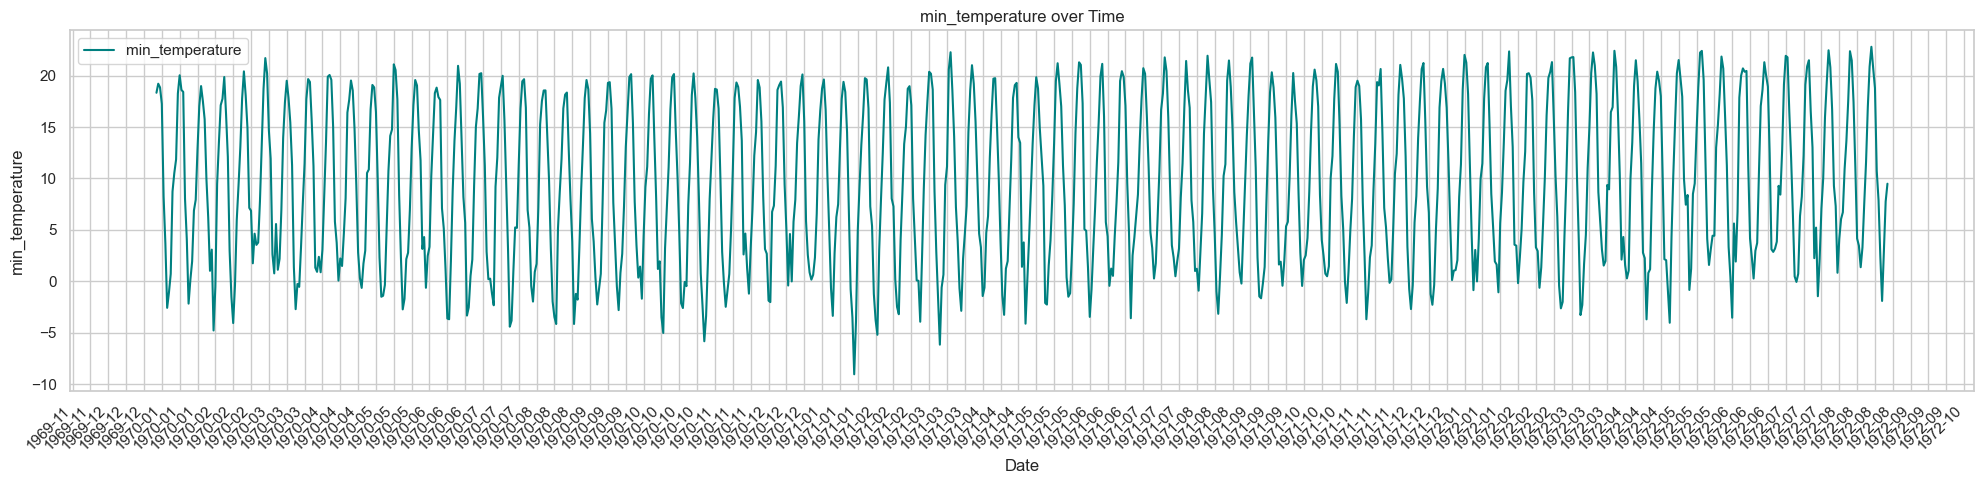

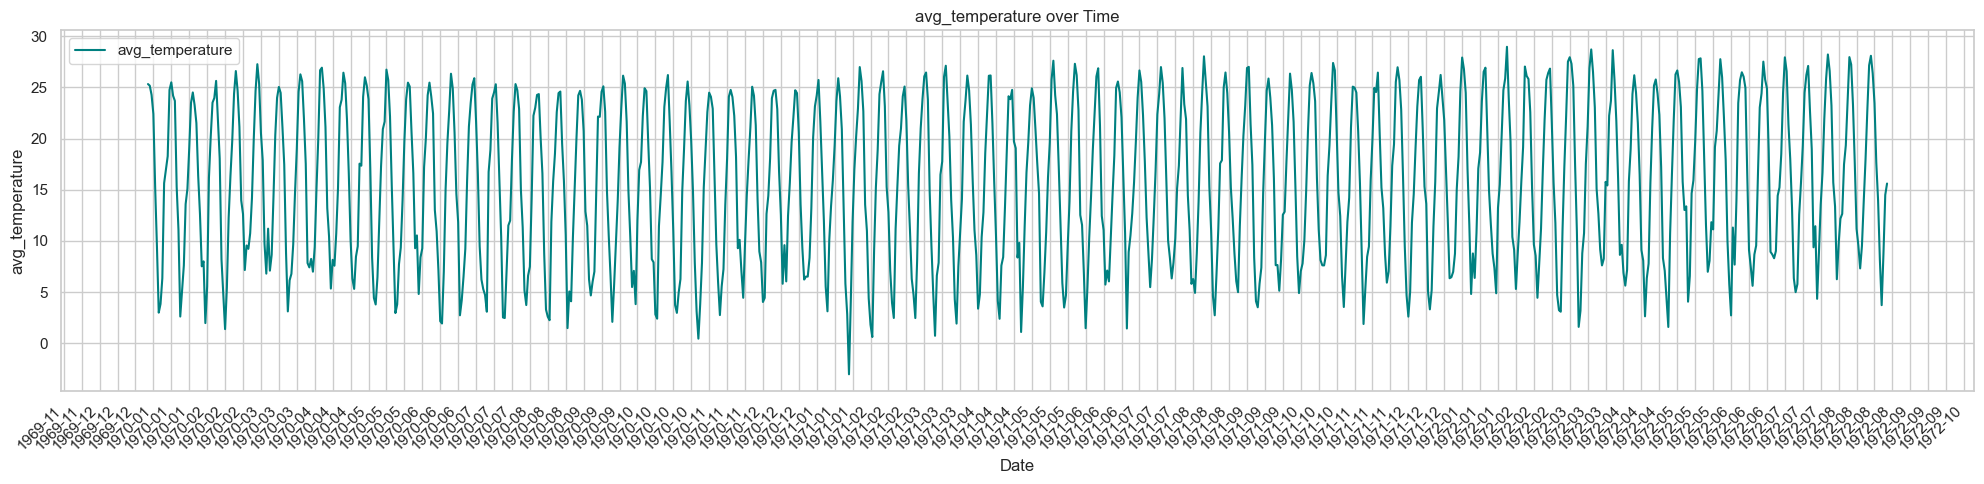

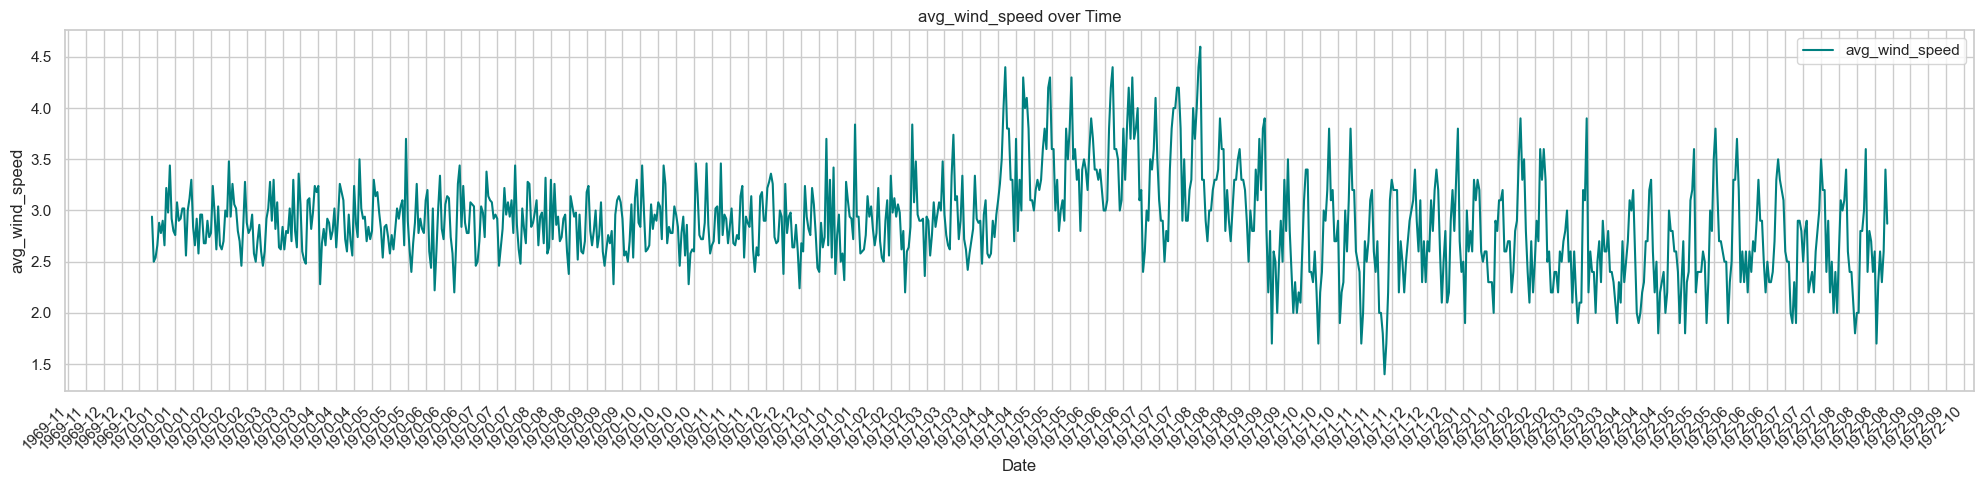

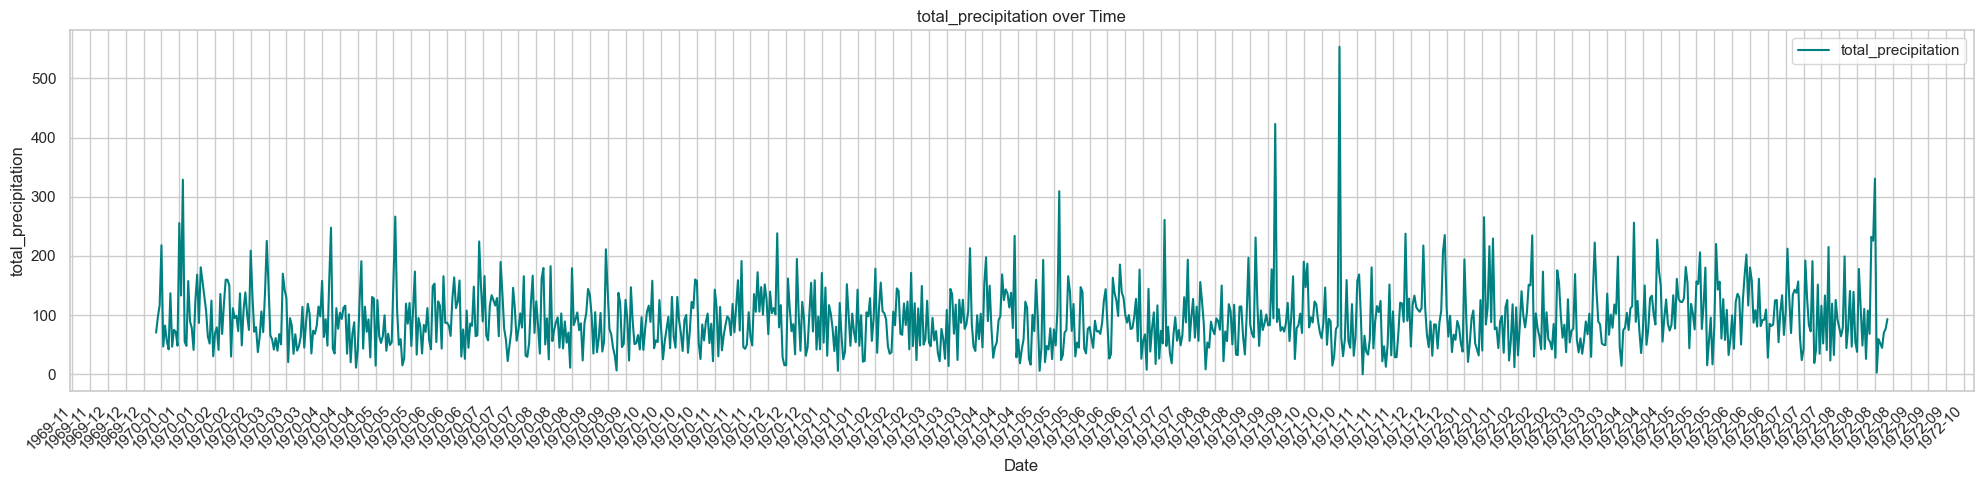

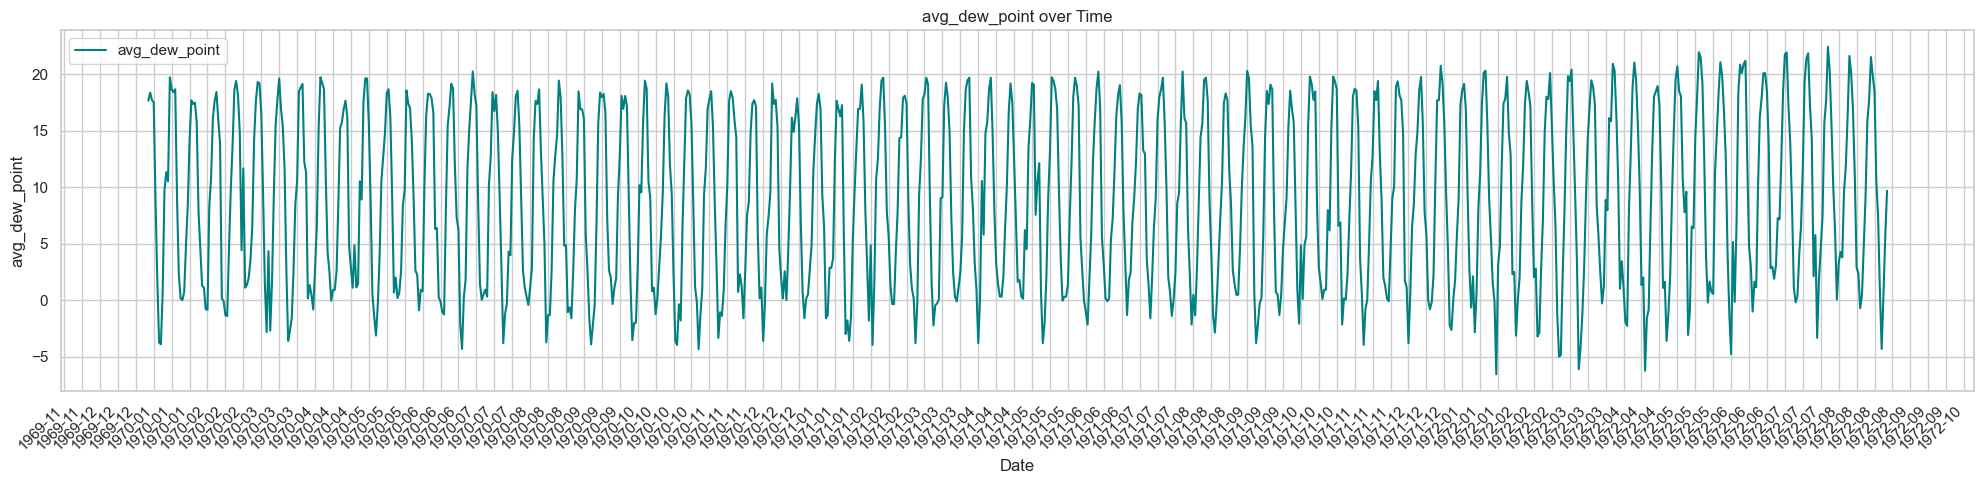

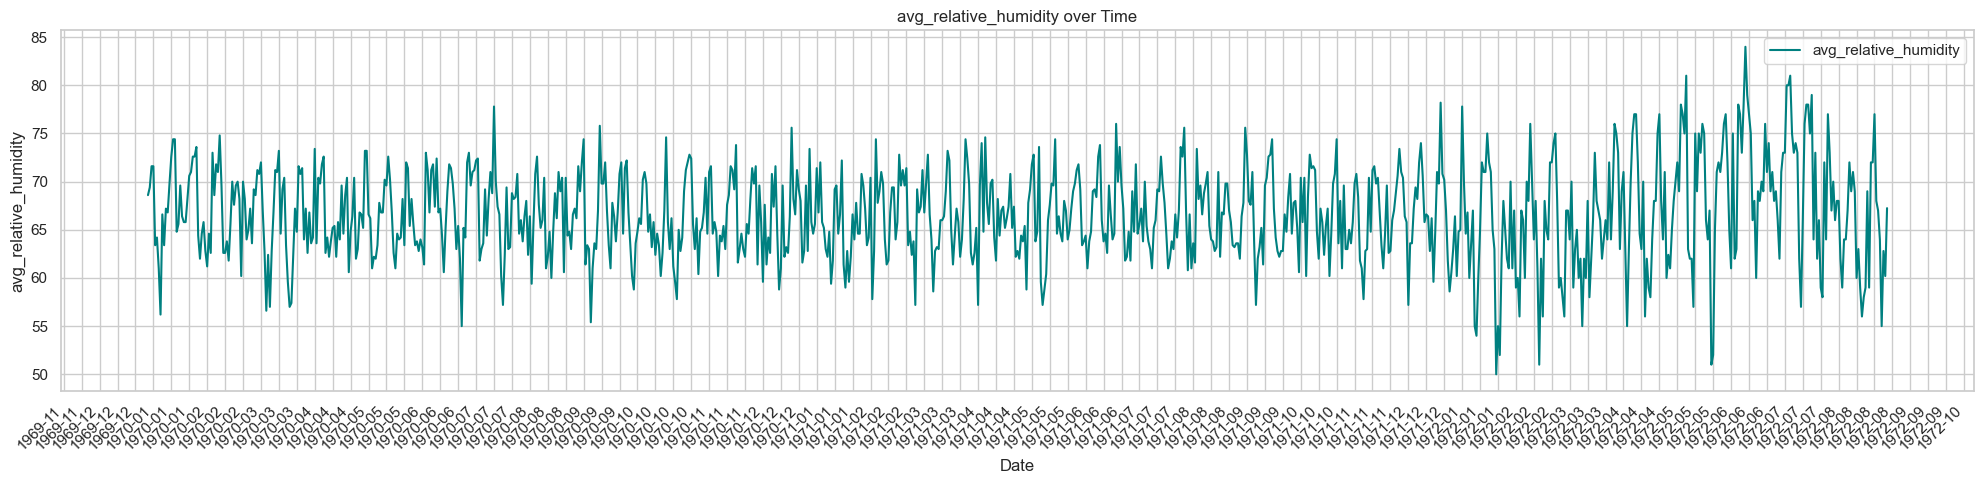

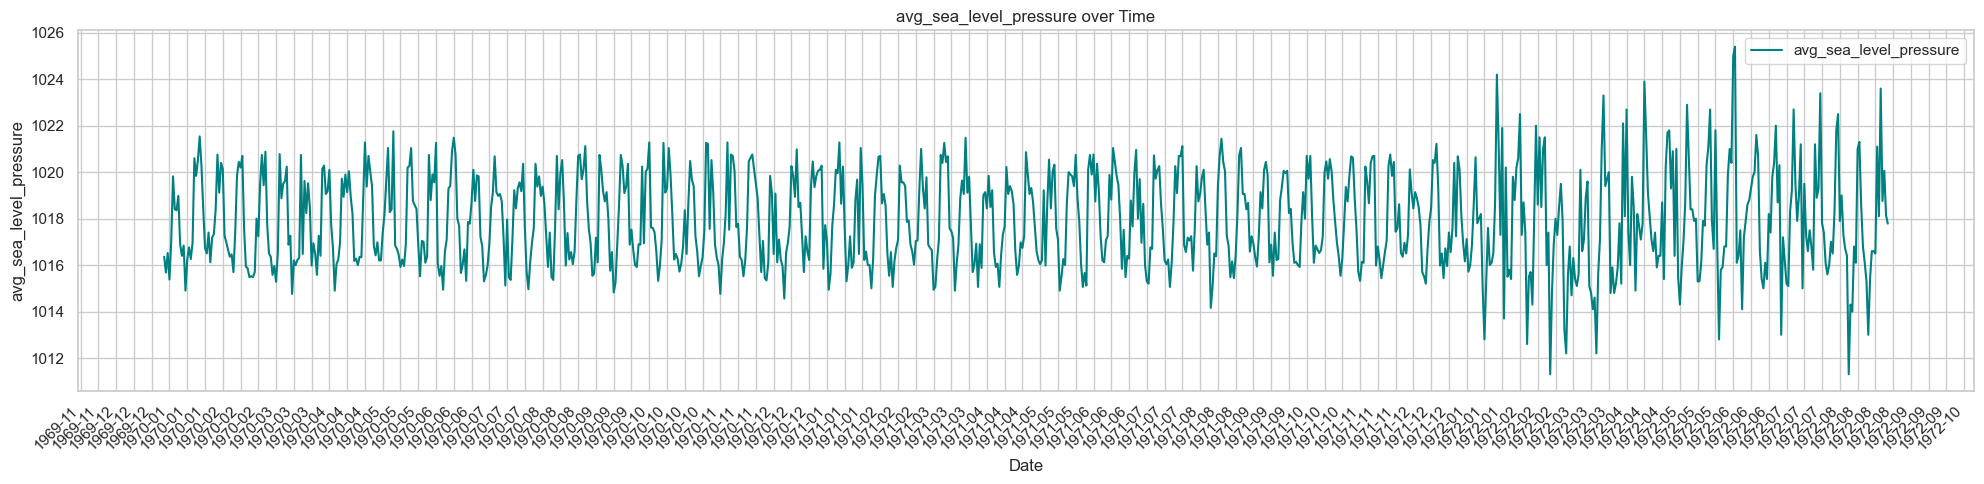

In [67]:
#loop through the features and plot
for feature in df_imputed.columns:
    if feature != 'date':  # Skip 'date' as we are plotting other features
        plt.figure(figsize=(20, 5))  
        plt.plot(df_imputed['date'], df_imputed[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

In [68]:
#Double check for missing values in imputed data
df_imputed.isna().any(axis=1).sum()

0

### No empty or NAN Values are present, time to remove outliers.

In [69]:
df_imputed.head()

max_temperature  min_temperature  avg_temperature  avg_wind_speed  \
0            32.31            18.33            25.32            2.94   
1            31.10            19.21            25.16            2.50   
2            29.68            18.85            24.26            2.54   
3            27.54            17.25            22.40            2.66   
4            22.29             8.25            15.27            2.88   

   total_precipitation  avg_dew_point  avg_relative_humidity  \
0                 70.4         17.682                   68.6   
1                 97.0         18.384                   69.4   
2                117.0         17.752                   71.6   
3                218.0         17.532                   71.6   
4                 46.9          8.866                   63.4   

   avg_sea_level_pressure     date  
0                 1016.36  1944-06  
1                 1015.68  1944-07  
2                 1016.52  1944-08  
3                 1015.38  1944-09  
4                 1017.06  1944-10

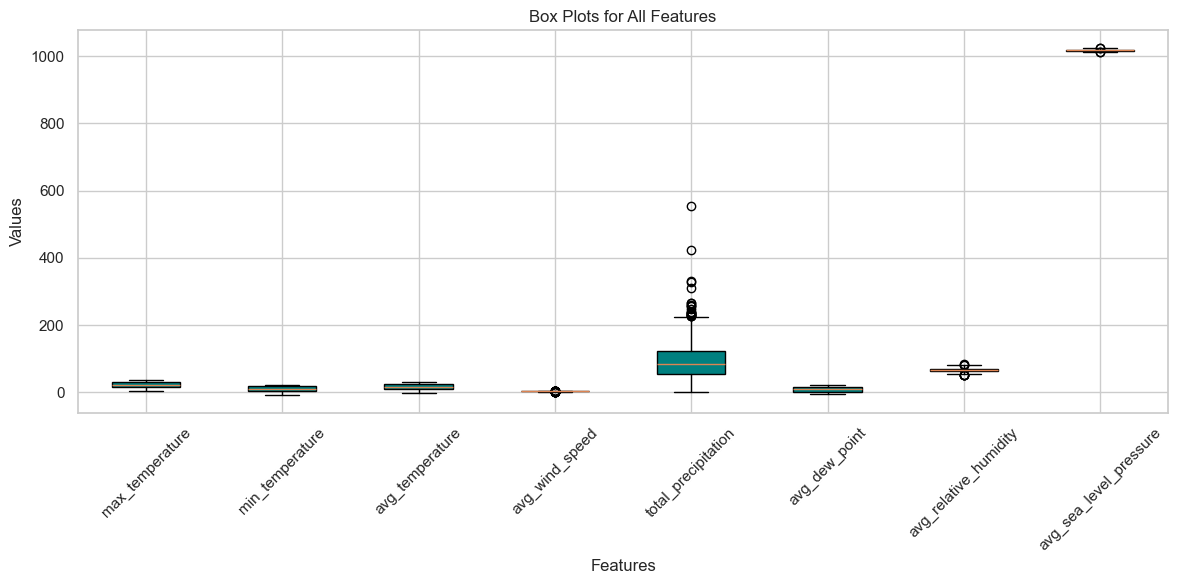

In [70]:
plt.figure(figsize=(12, 6))

# Create a box plot for each feature (excluding 'date' and 'station_id')
plt.boxplot([df_imputed[feature] for feature in df_imputed.columns if feature != 'date'], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(df_imputed.columns)), [feature for feature in df_imputed.columns if feature != 'date'], rotation=45)


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots for All Features')


plt.tight_layout()
plt.show()


### Remove outliers

In [71]:
df_imputed = df_imputed[
    (df_imputed['total_precipitation'] <= 200) &
    (df_imputed['avg_relative_humidity'] <= 80) & (df_imputed['avg_relative_humidity'] >= 55) &
    (df_imputed['avg_wind_speed'] <= 4.25) & (df_imputed['avg_wind_speed'] >= 2.0) &
    (df_imputed['avg_sea_level_pressure'] <= 1024) & (df_imputed['avg_sea_level_pressure'] >= 1013)
]

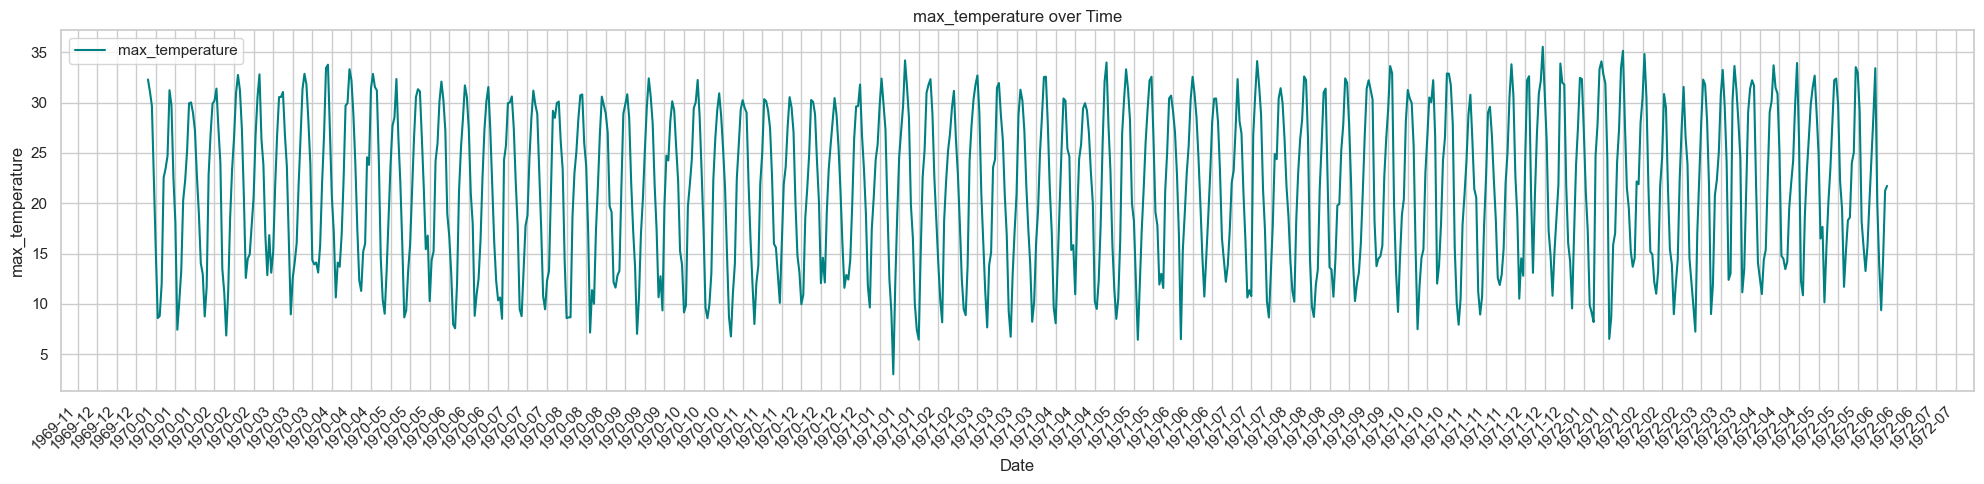

In [ ]:
#loop through the features and plot
for feature in df_imputed.columns:
    if feature != 'date':  # Skip 'date' as we are plotting other features
        plt.figure(figsize=(20, 5))  
        plt.plot(df_imputed['date'], df_imputed[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

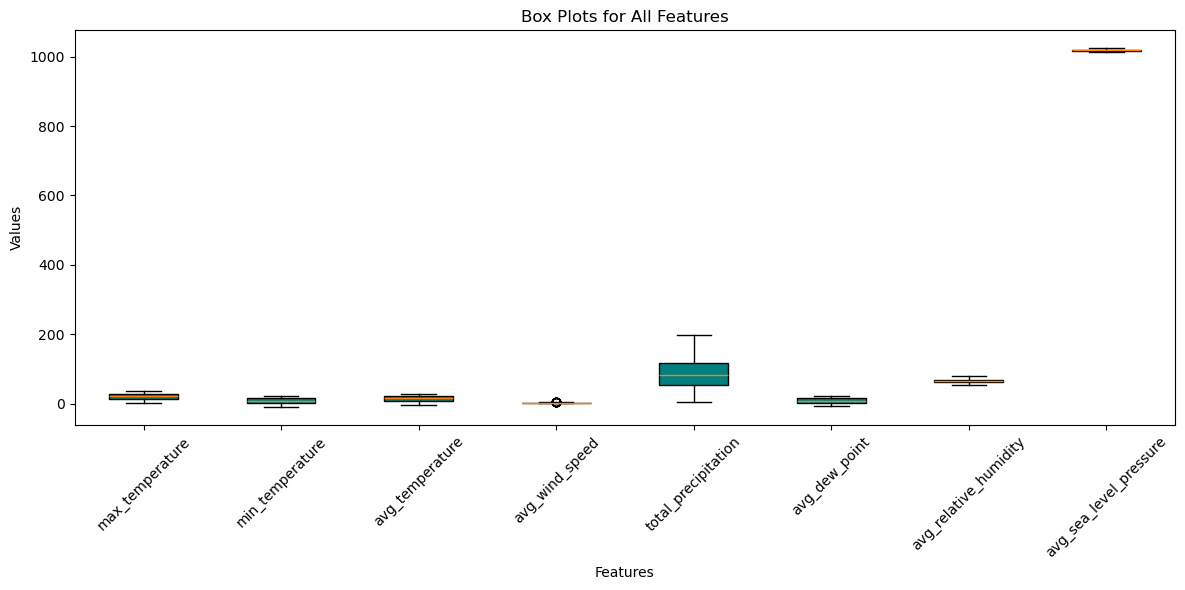

In [ ]:
plt.figure(figsize=(12, 6))

# Create a box plot for each feature (excluding 'date' and 'station_id')
plt.boxplot([df_imputed[feature] for feature in df_imputed.columns if feature != 'date'], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(df_imputed.columns)), [feature for feature in df_imputed.columns if feature != 'date'], rotation=45)


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots for All Features')


plt.tight_layout()
plt.show()

### Scale Data

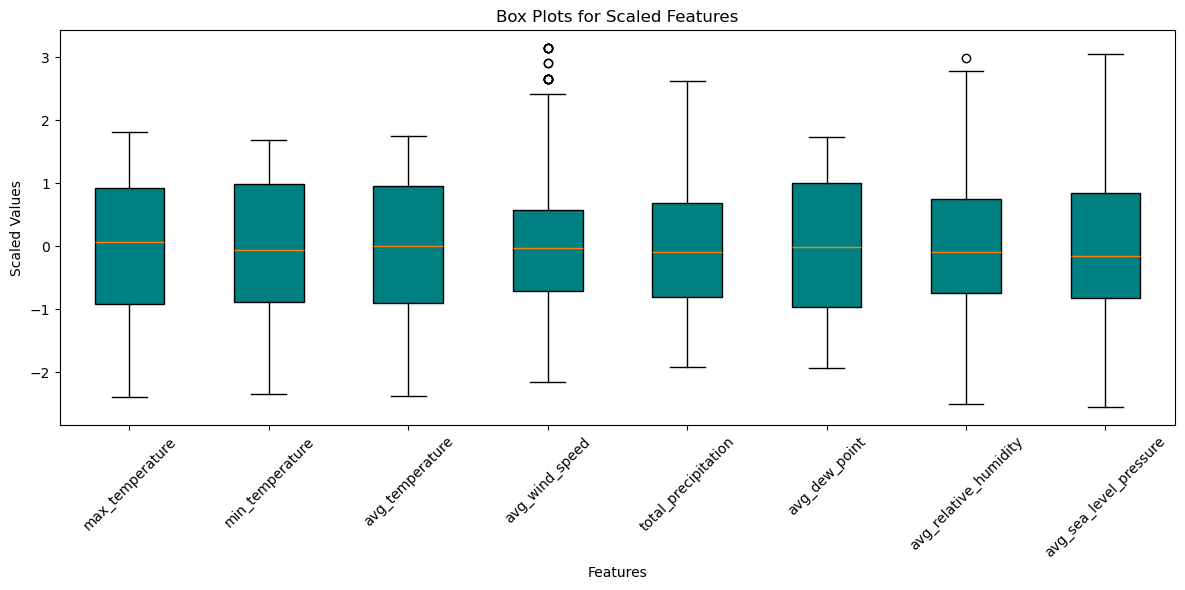

In [ ]:
# Scale the imputed data (excluding the 'date' column)
df_imputed_numeric = df_imputed.drop(columns=['date'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed_numeric)

# Convert scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_imputed_numeric.columns)

plt.figure(figsize=(12, 6))


data_for_boxplots = [df_scaled[feature] for feature in df_scaled.columns]

# Create the box plots
plt.boxplot(data_for_boxplots, patch_artist=True, boxprops=dict(facecolor='teal', color='black'))


plt.xticks(range(1, len(df_scaled.columns) + 1), df_scaled.columns, rotation=45)


plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.title('Box Plots for Scaled Features')


plt.tight_layout()
plt.show()

## Do the same steps for cleaning dataset 2

In [ ]:
# Read the original dataset
df2 = pd.read_csv('../data/CA00301A001.csv')

# Extract only the relevant columns for rain prediction
rain_prediction_df2 = df2[[
    'STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
    'PRCP', 'DP01', 'DP10', 'DP1X', 'EMXP',
    'TAVG', 'TMAX', 'TMIN', 'WDFG', 'WSFG'
]]

# Rename columns to more readable names
rain_prediction_df2 = rain_prediction_df2.rename(columns={
    'STATION': 'station_id',
    'DATE': 'date',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'ELEVATION': 'elevation_m',
    'PRCP': 'total_precipitation',
    'DP01': 'days_precip_ge_0.01in',
    'DP10': 'days_precip_ge_0.1in',
    'DP1X': 'days_precip_ge_1.0in',
    'EMXP': 'max_daily_precip',
    'TAVG': 'avg_temperature',
    'TMAX': 'max_temperature',
    'TMIN': 'min_temperature',
    'WDFG': 'wind_direction_peak',
    'WSFG': 'wind_speed_peak'
})

In [ ]:
rain_prediction_df2.head()

station_id     date  latitude  longitude  elevation_m  \
0  CA00301A001  1997-04     53.55  -114.1167        766.0   
1  CA00301A001  1997-05     53.55  -114.1167        766.0   
2  CA00301A001  1997-06     53.55  -114.1167        766.0   
3  CA00301A001  1997-07     53.55  -114.1167        766.0   
4  CA00301A001  1997-08     53.55  -114.1167        766.0   

   total_precipitation  days_precip_ge_0.01in  days_precip_ge_0.1in  \
0                 33.4                    6.0                   1.0   
1                 16.0                    6.0                   3.0   
2                166.2                   20.0                  12.0   
3                 58.8                   14.0                   7.0   
4                 51.8                   10.0                   5.0   

   days_precip_ge_1.0in  max_daily_precip  avg_temperature  max_temperature  \
0                   1.0              26.4             2.20             7.79   
1                   0.0               6.4            10.21            15.65   
2                   1.0              45.0            14.43            19.10   
3                   0.0              12.2            16.11            21.56   
4                   1.0              26.4            16.13            21.76   

   min_temperature  wind_direction_peak  wind_speed_peak  
0            -3.39                  NaN              NaN  
1             4.77                  NaN              NaN  
2             9.76                  NaN              NaN  
3            10.67                  NaN              NaN  
4            10.50                  NaN              NaN

In [ ]:
rain_prediction_df2.drop(['latitude','longitude','elevation_m','days_precip_ge_1.0in','days_precip_ge_0.1in'], axis=1, inplace=True)

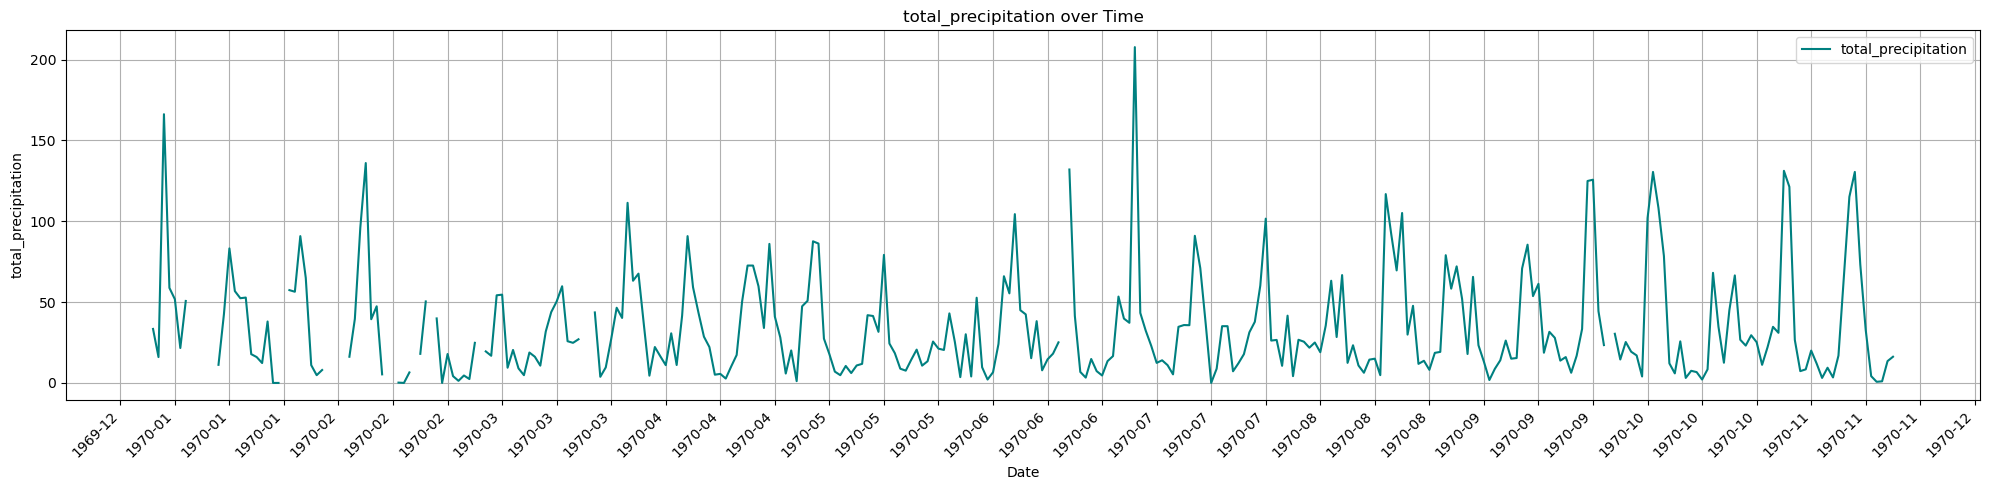

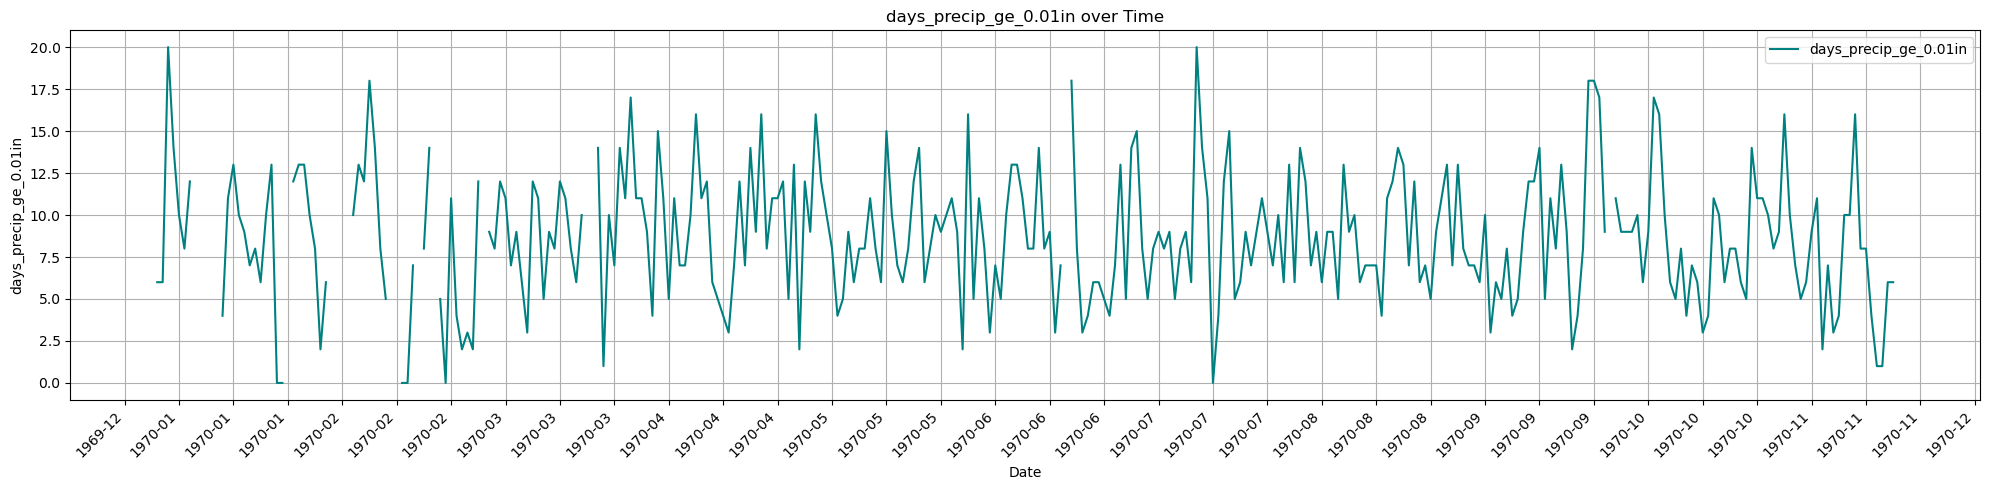

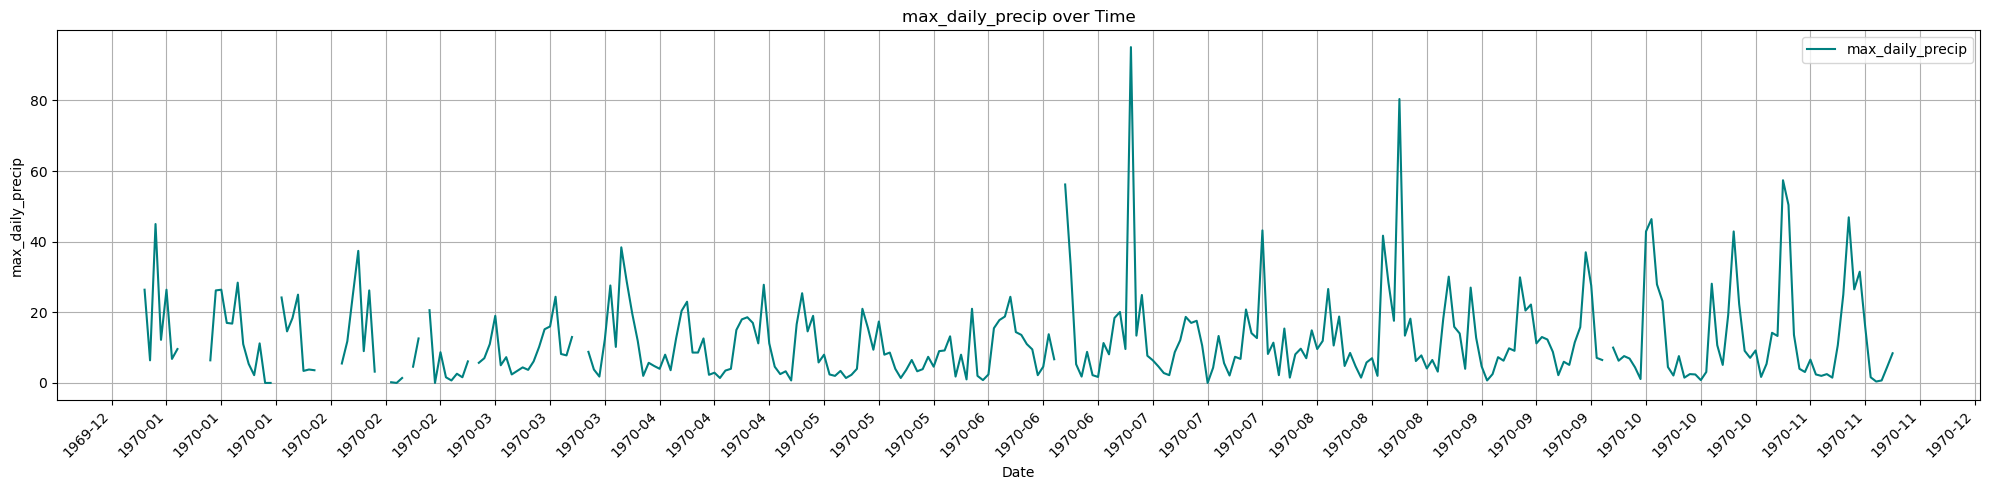

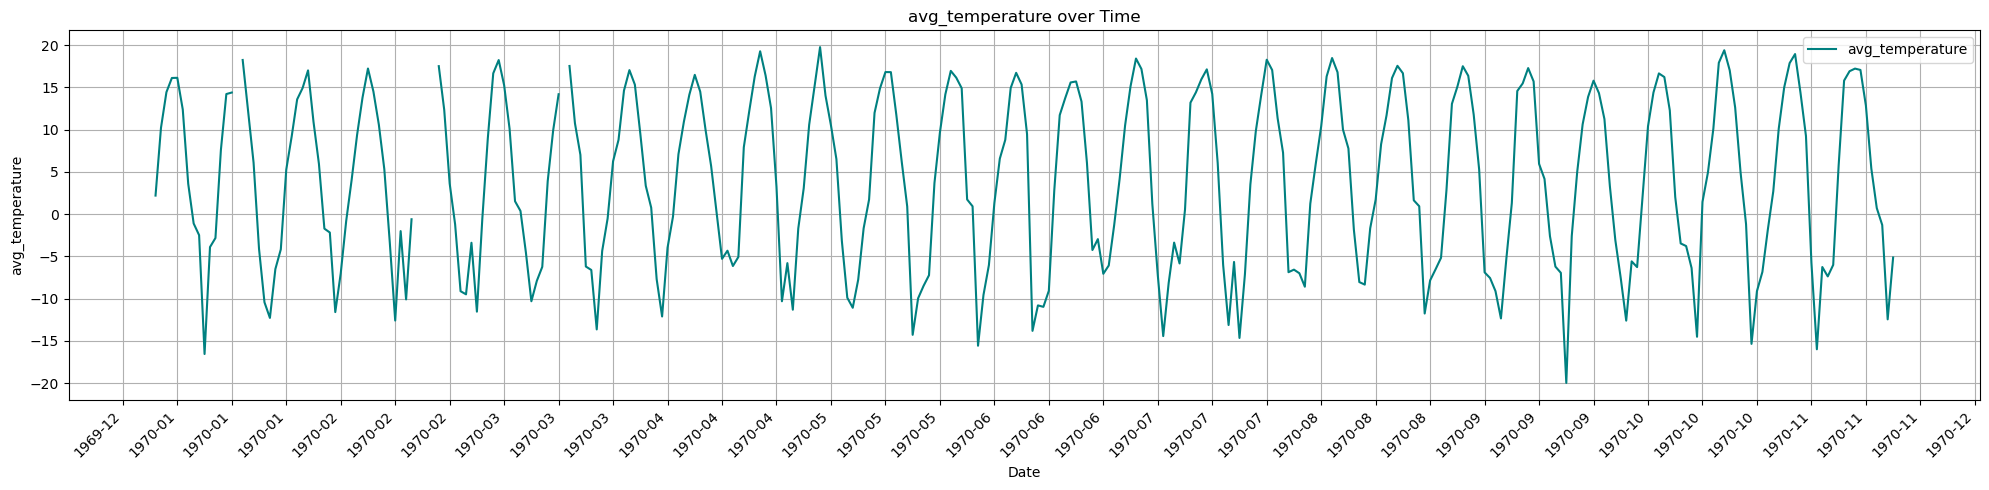

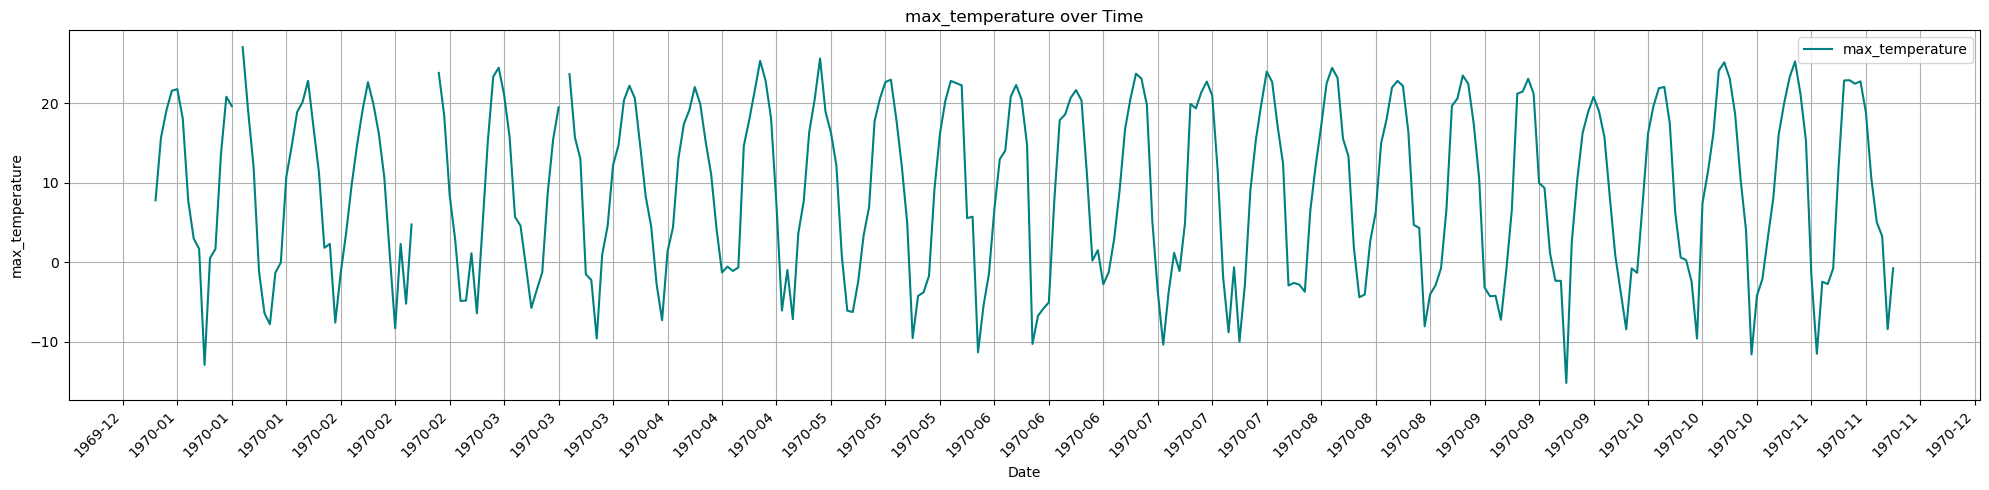

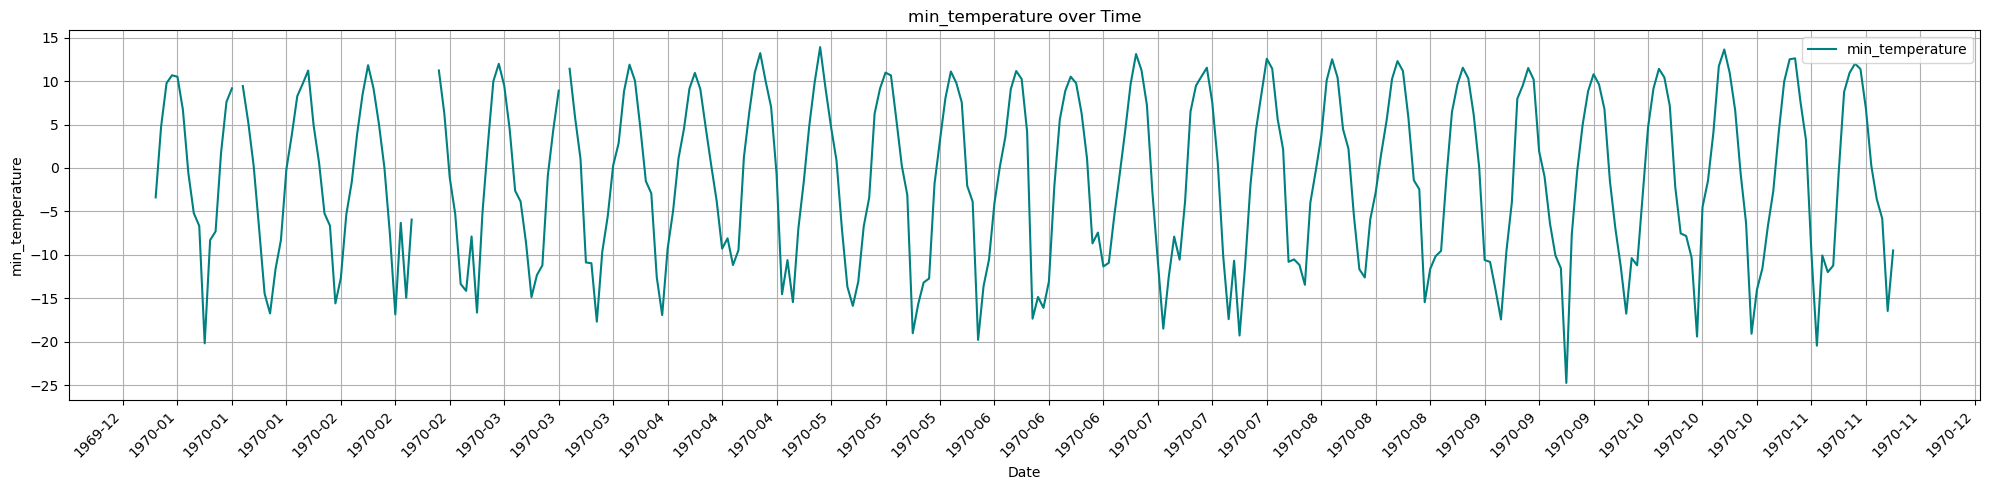

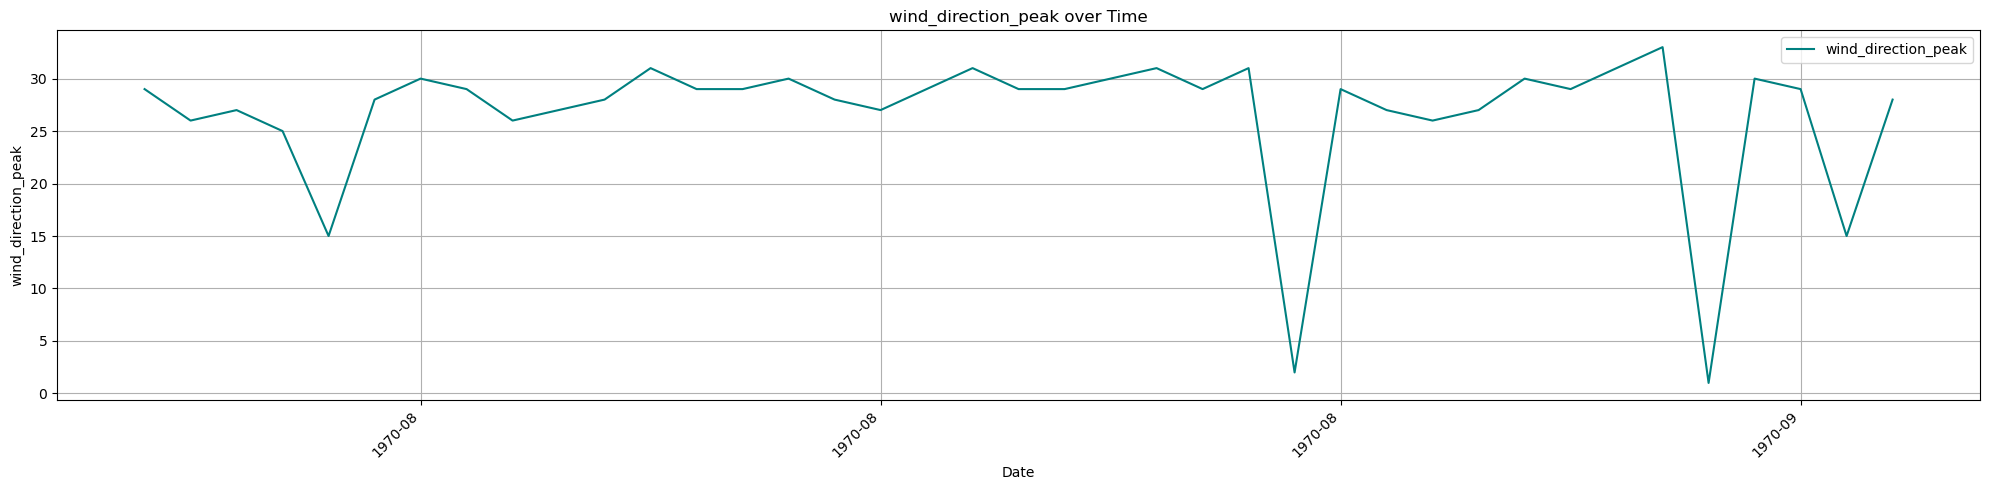

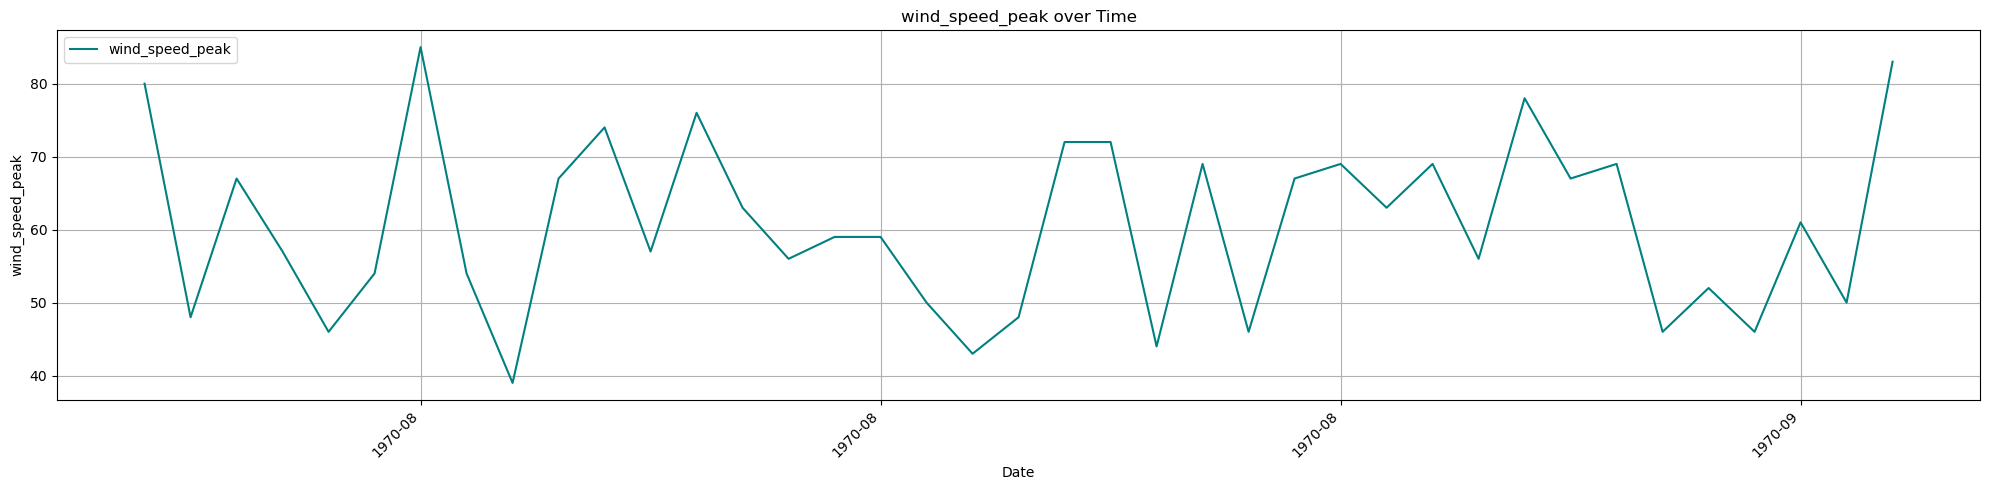

In [ ]:
#loop through the features and plot
for feature in rain_prediction_df2.columns:
    if feature != 'date' and feature != 'station_id':  
        plt.figure(figsize=(20, 5))  
        plt.plot(rain_prediction_df2['date'], rain_prediction_df2[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()


In [ ]:

# Define which columns are IDs vs numeric data
id_columns = ['station_id', 'date']
numeric_columns = [col for col in rain_prediction_df2.columns if col not in id_columns]

# Create a dataframe with only numeric columns for imputation
df_selected_numeric = rain_prediction_df2[numeric_columns]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
rain_prediction_imputed = imputer.fit_transform(df_selected_numeric)

# Convert the imputed data back into a DataFrame with original column names
rain_prediction_df_imputed = pd.DataFrame(rain_prediction_imputed, columns=numeric_columns)

# Reattach the id columns
for col in id_columns:
    if col in rain_prediction_df2.columns:
        rain_prediction_df_imputed[col] = rain_prediction_df2[col].reset_index(drop=True)

# Check the result
print(rain_prediction_df_imputed.head())
# Verify there are no missing values
print(f"Missing values after imputation: {rain_prediction_df_imputed.isna().sum().sum()}")

   total_precipitation  days_precip_ge_0.01in  max_daily_precip  \
0                 33.4                    6.0              26.4   
1                 16.0                    6.0               6.4   
2                166.2                   20.0              45.0   
3                 58.8                   14.0              12.2   
4                 51.8                   10.0              26.4   

   avg_temperature  max_temperature  min_temperature  wind_direction_peak  \
0             2.20             7.79            -3.39                 29.6   
1            10.21            15.65             4.77                 25.2   
2            14.43            19.10             9.76                 29.0   
3            16.11            21.56            10.67                 27.4   
4            16.13            21.76            10.50                 21.8   

   wind_speed_peak   station_id     date  
0             61.0  CA00301A001  1997-04  
1             65.6  CA00301A001  1997-05  
2    

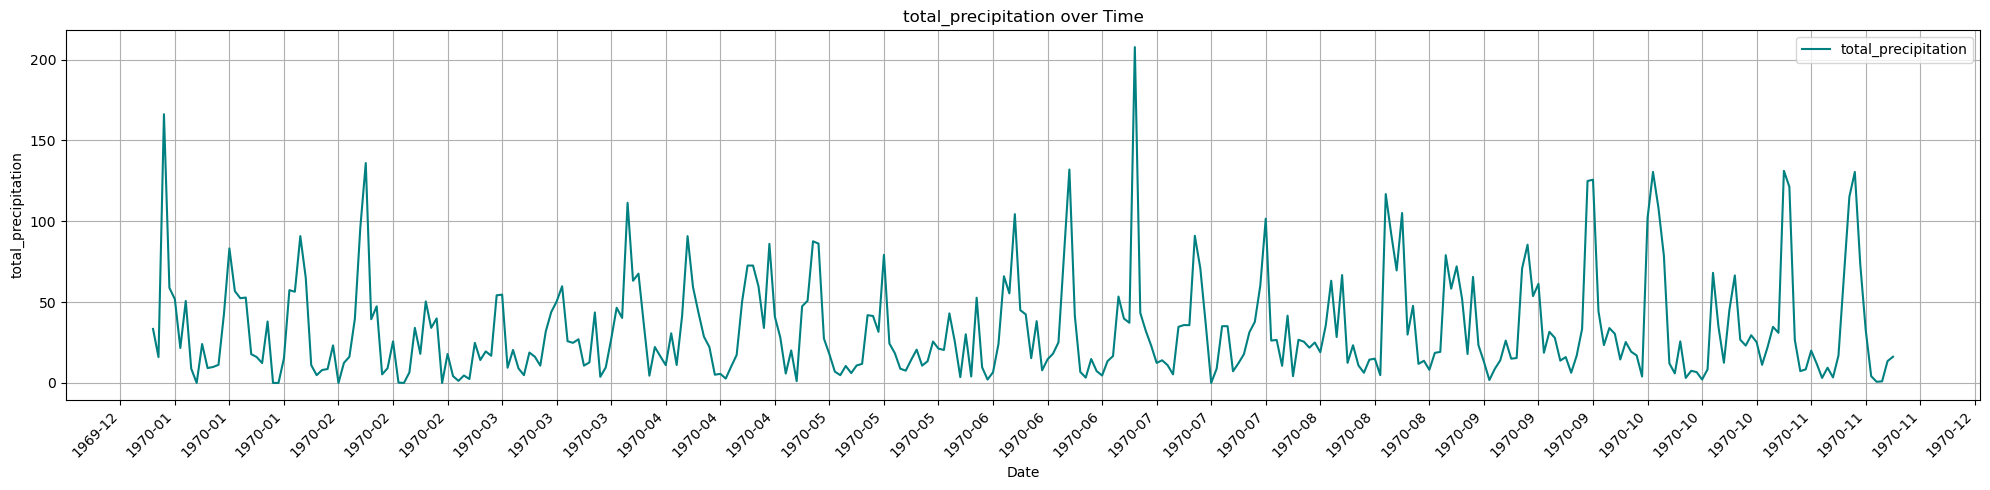

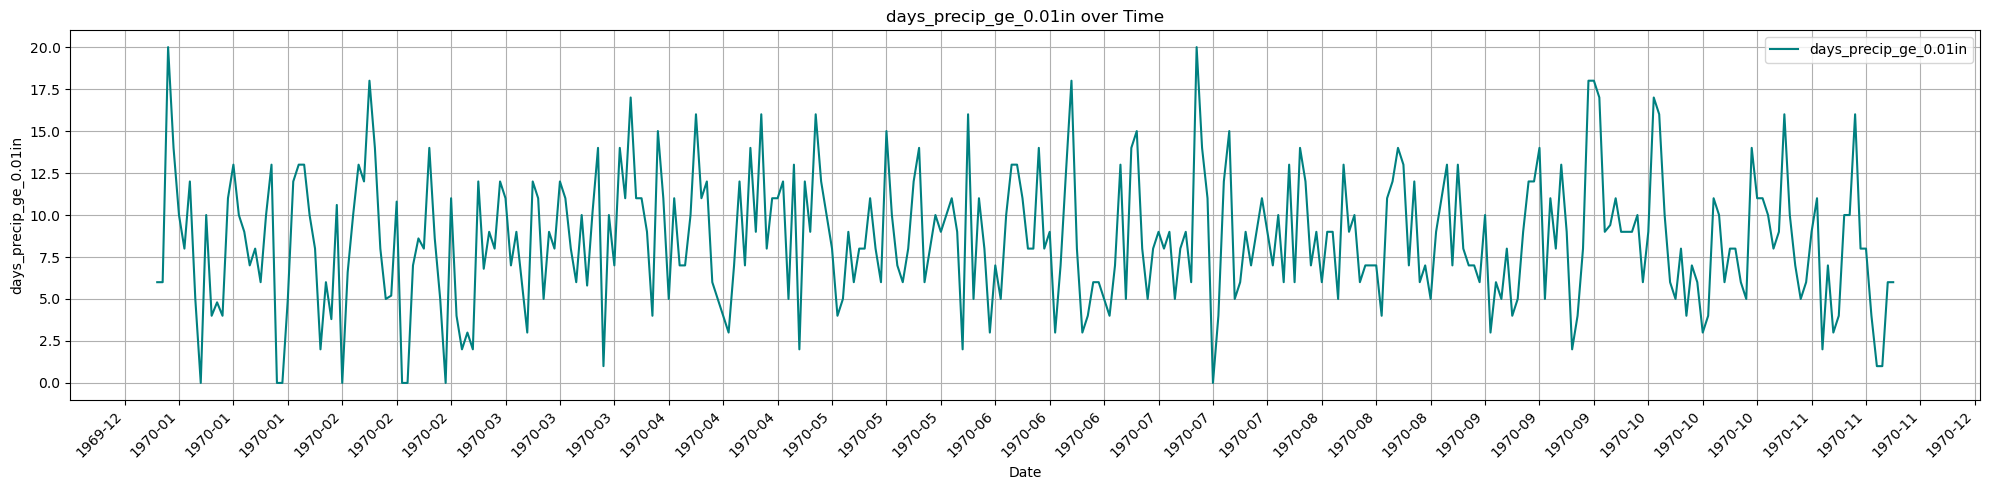

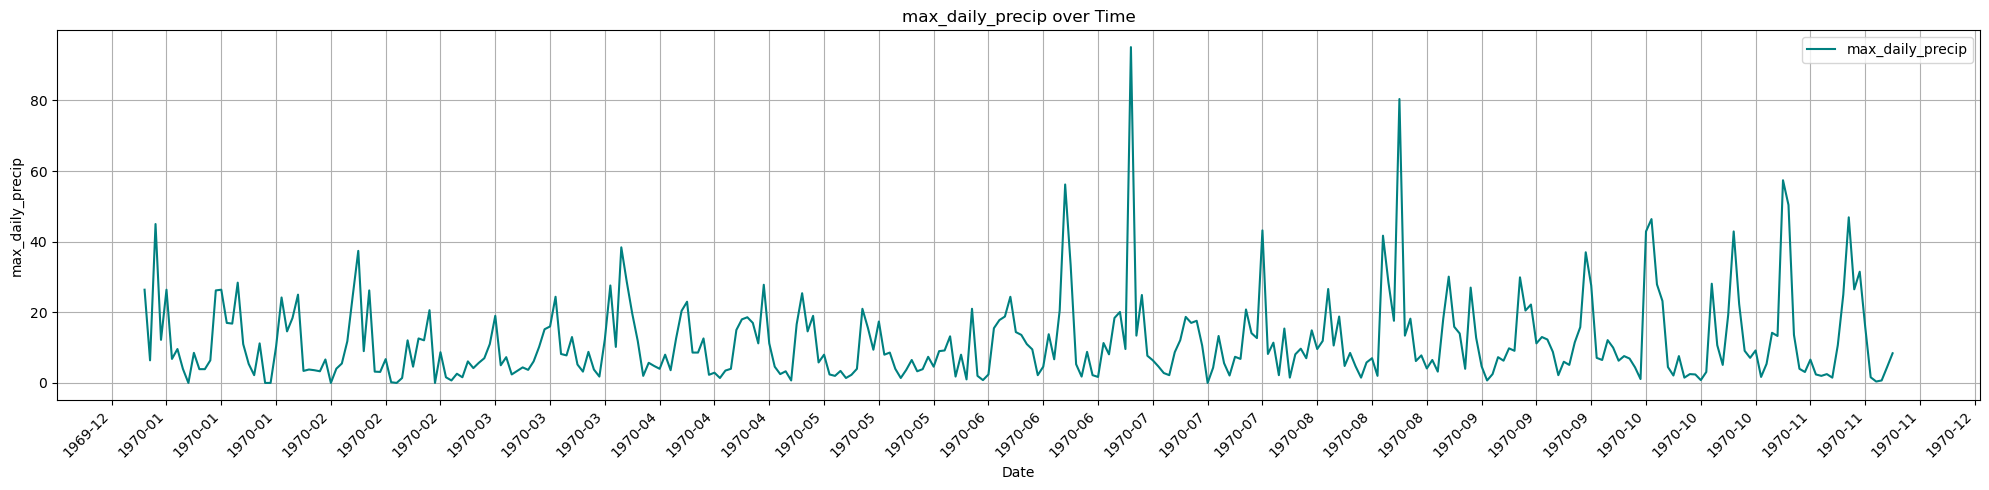

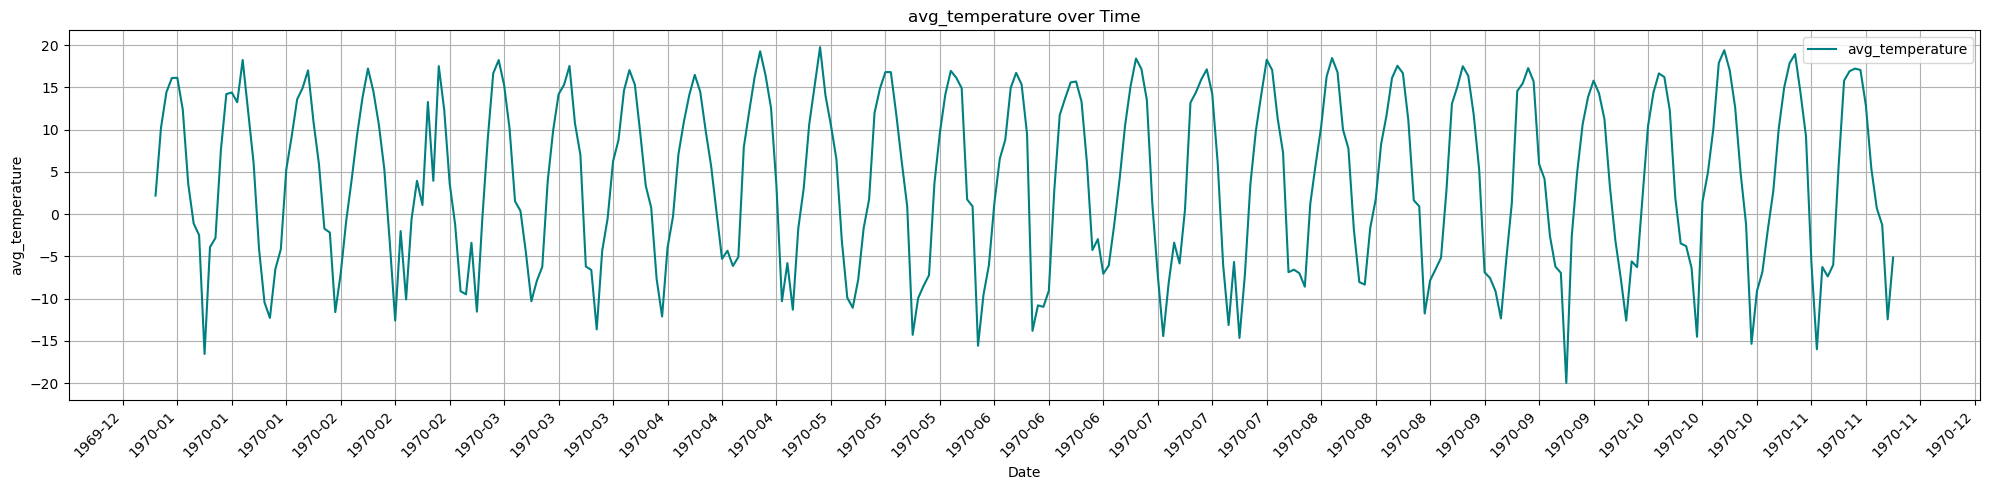

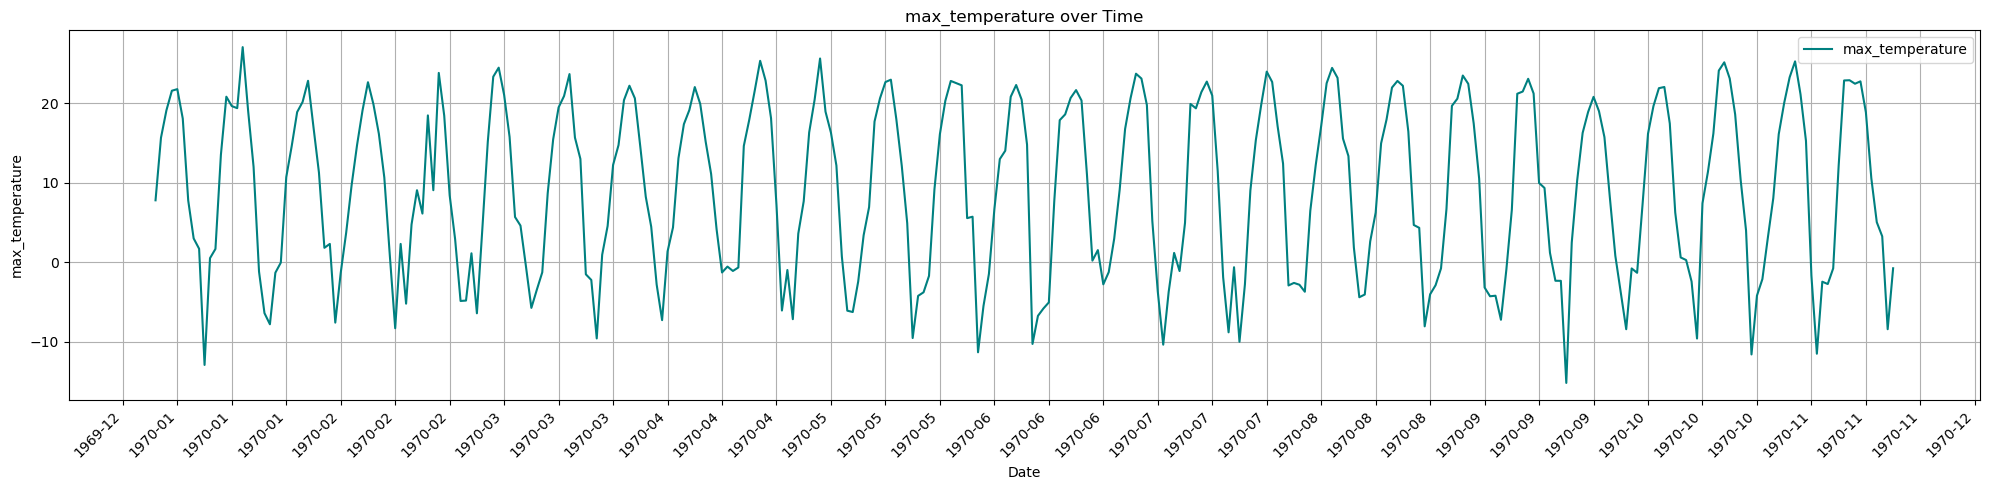

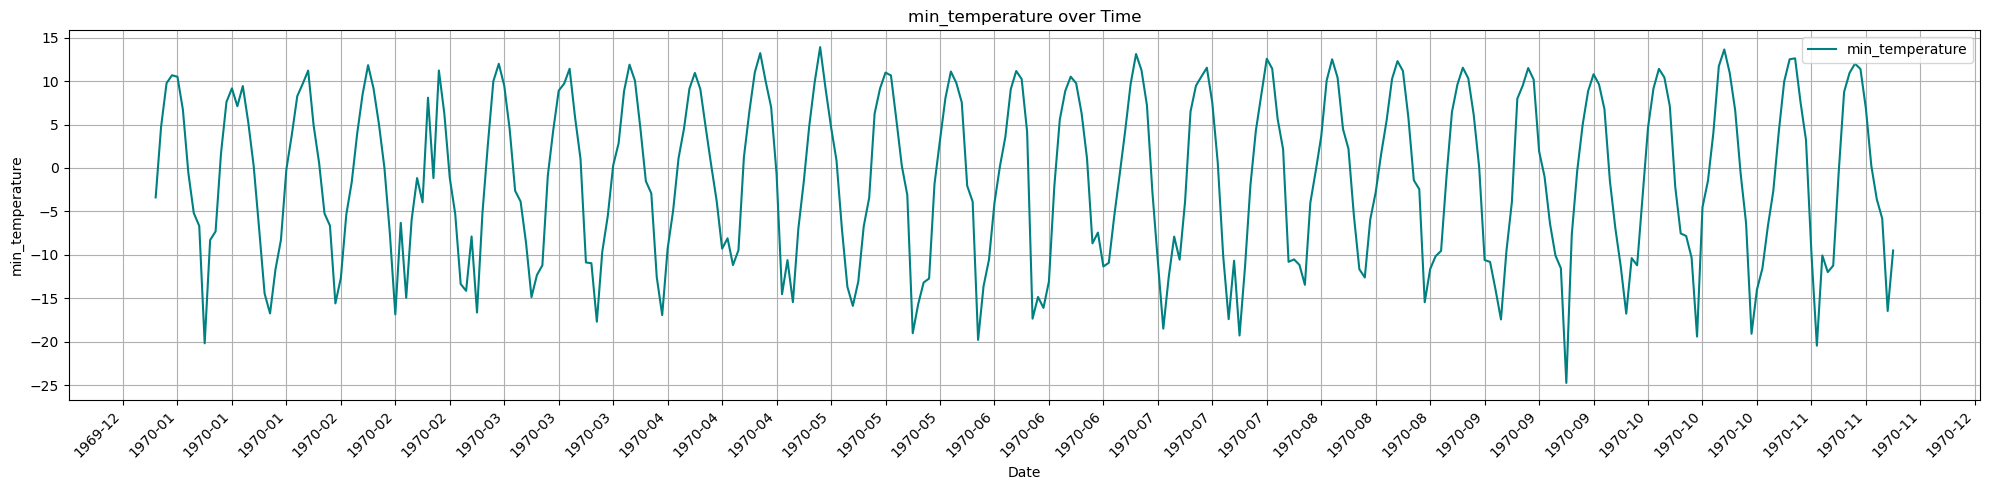

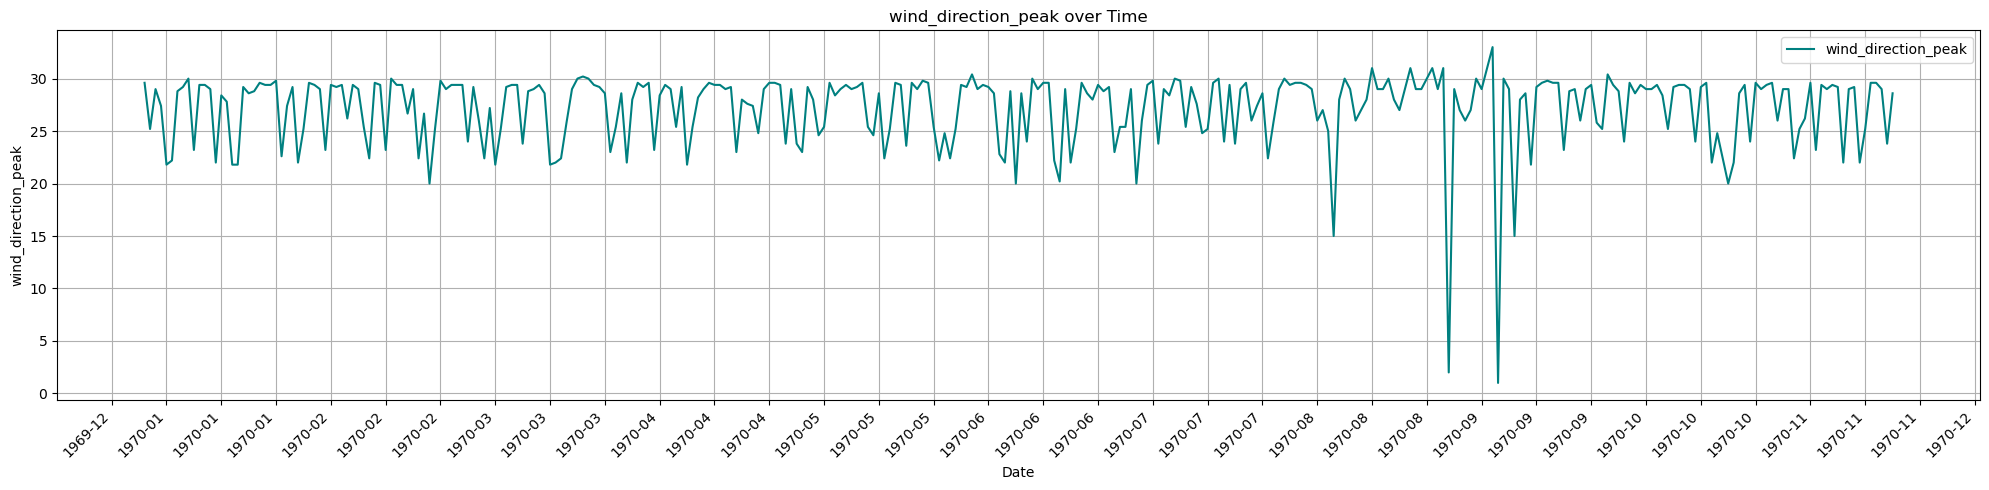

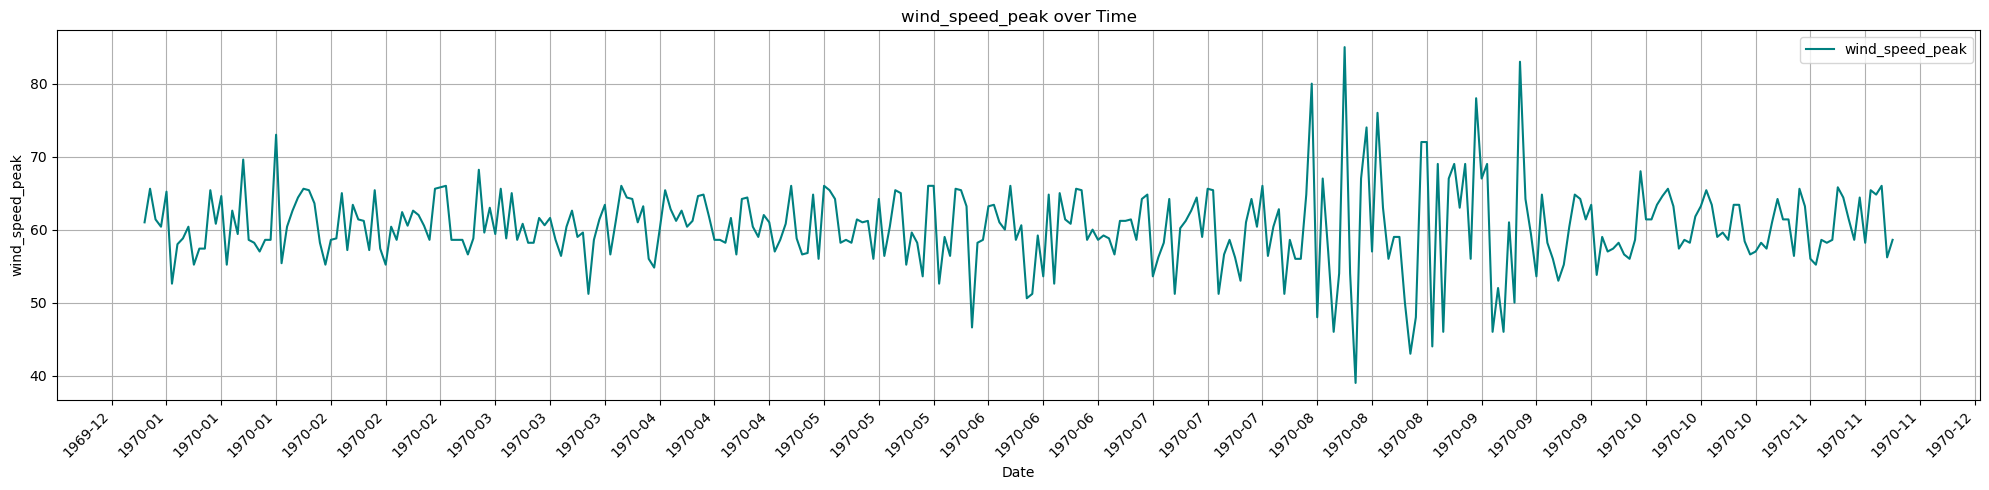

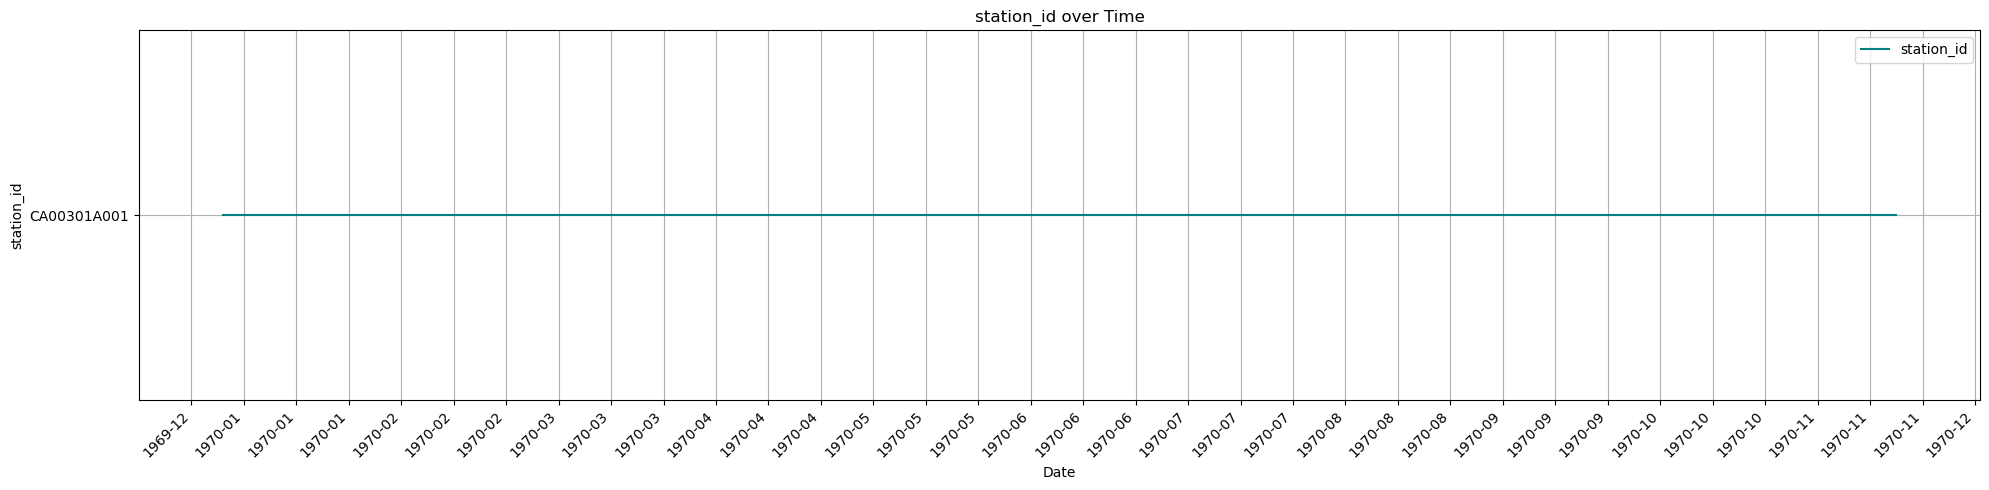

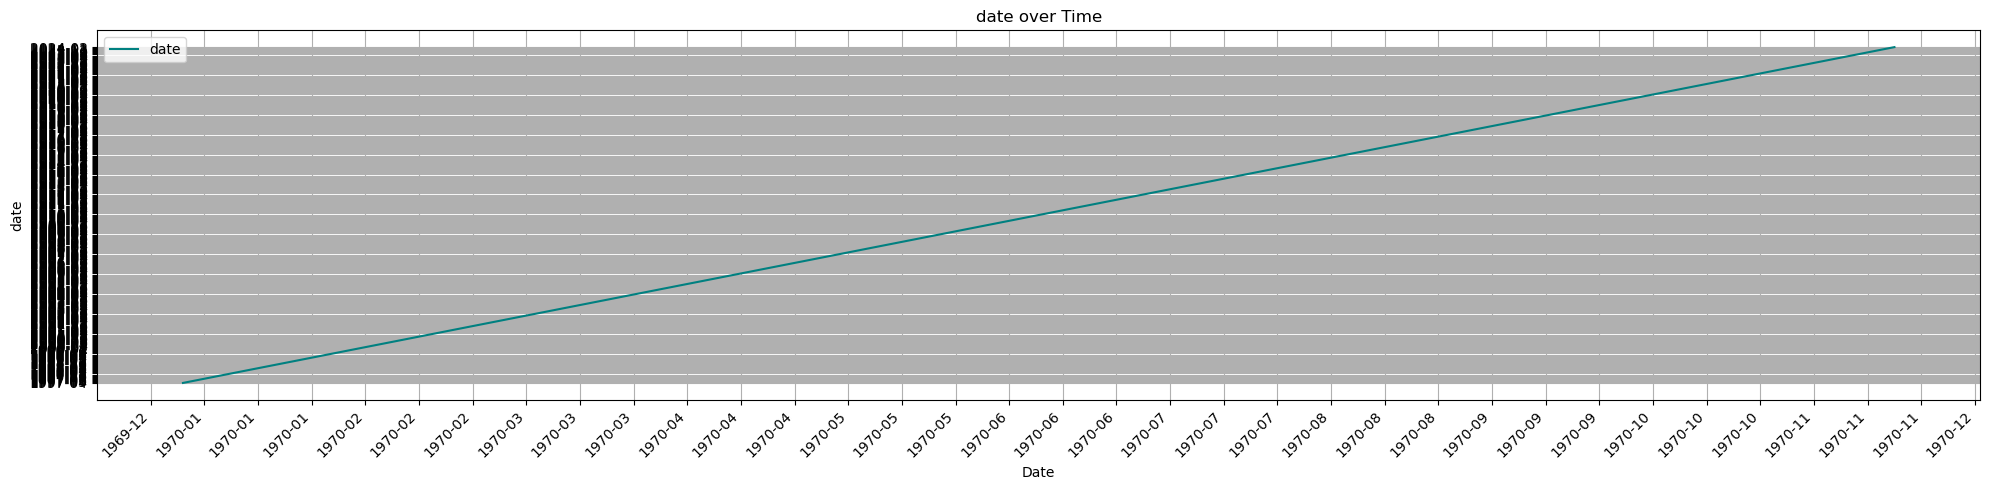

In [ ]:
for feature in rain_prediction_df_imputed.columns:
        plt.figure(figsize=(20, 5))  
        plt.plot(rain_prediction_df_imputed['date'], rain_prediction_df_imputed[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

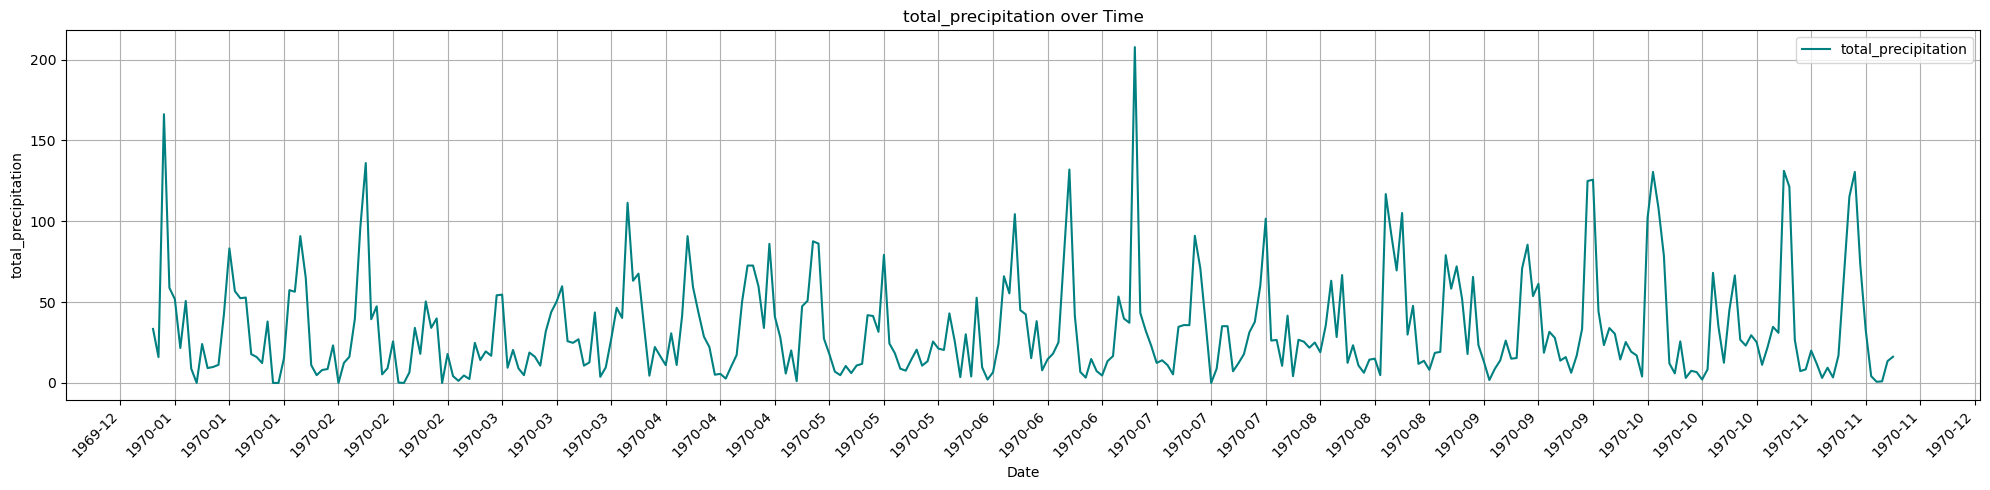

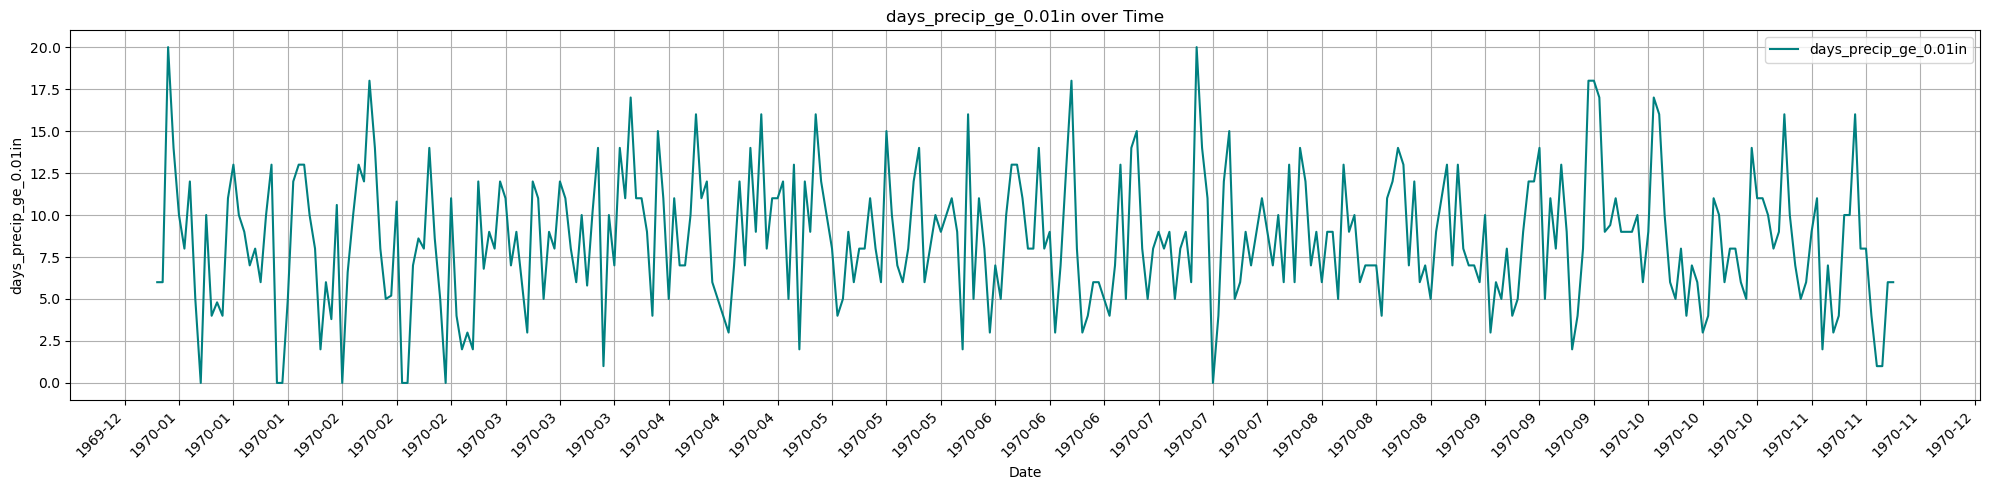

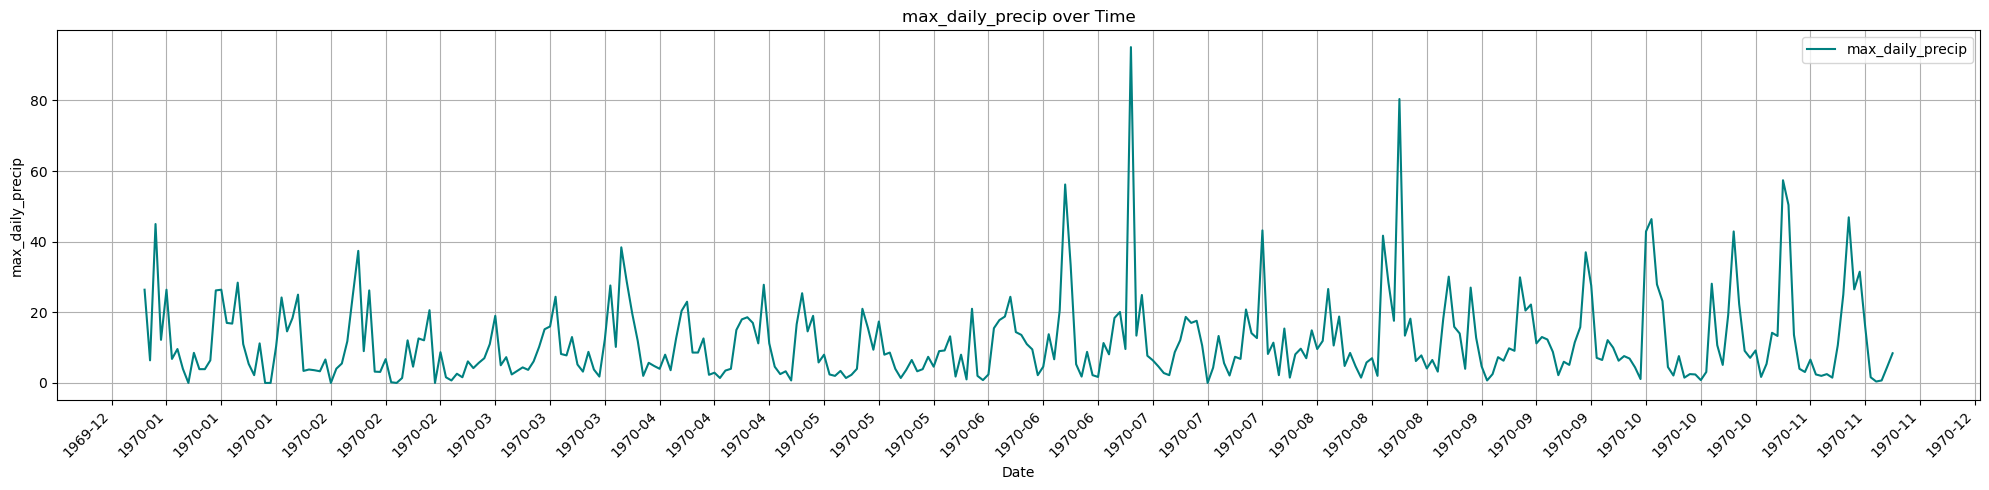

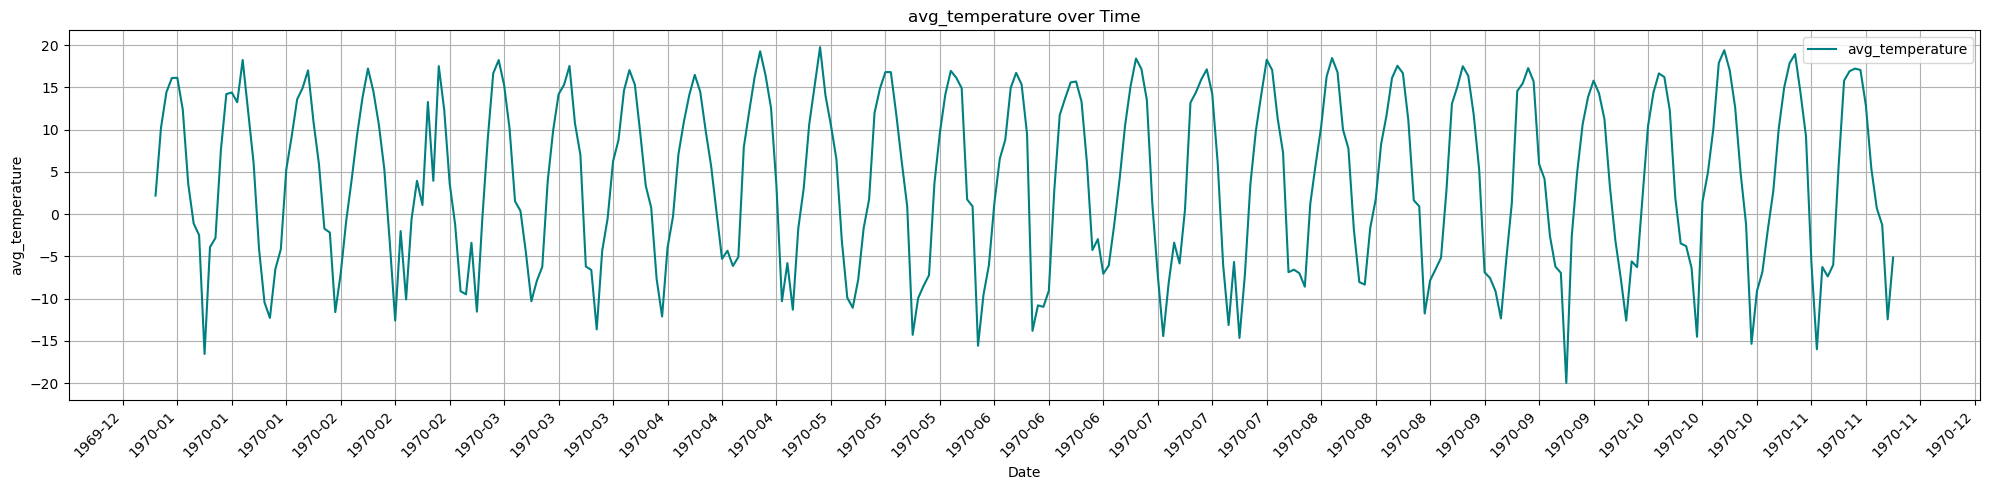

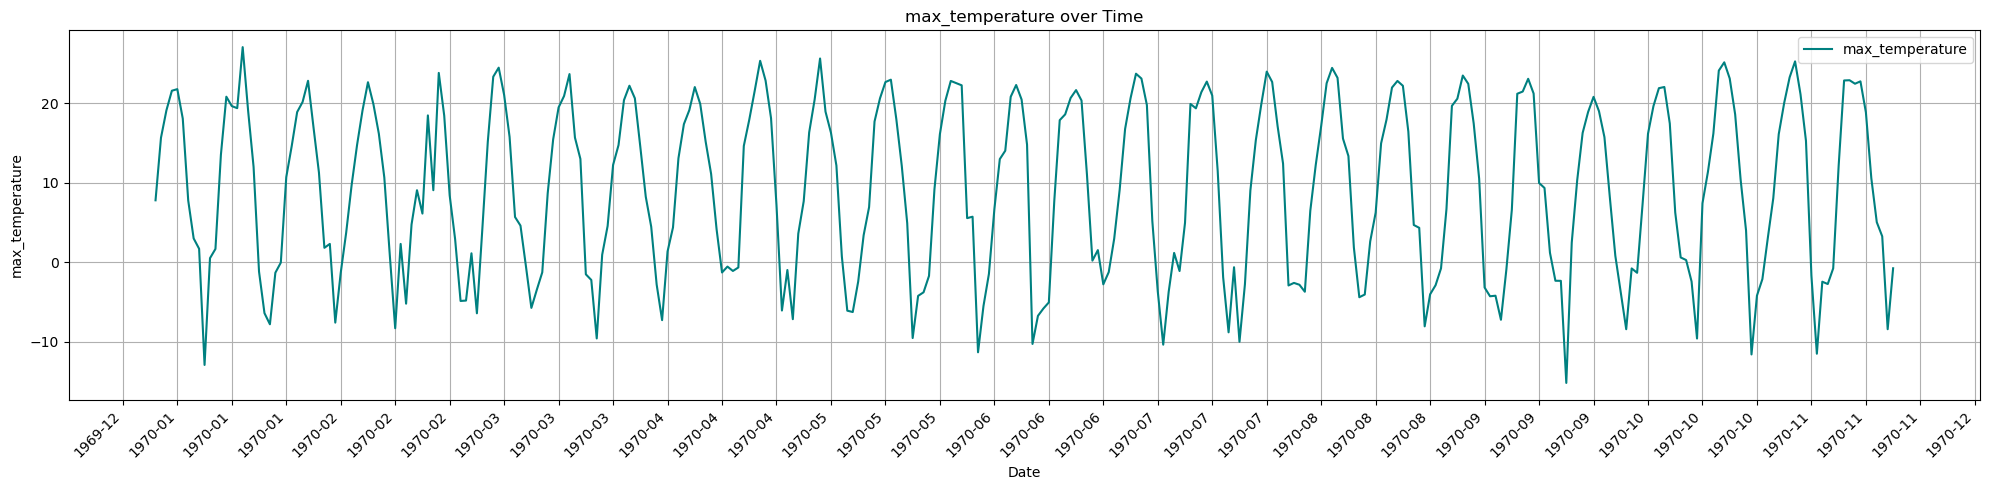

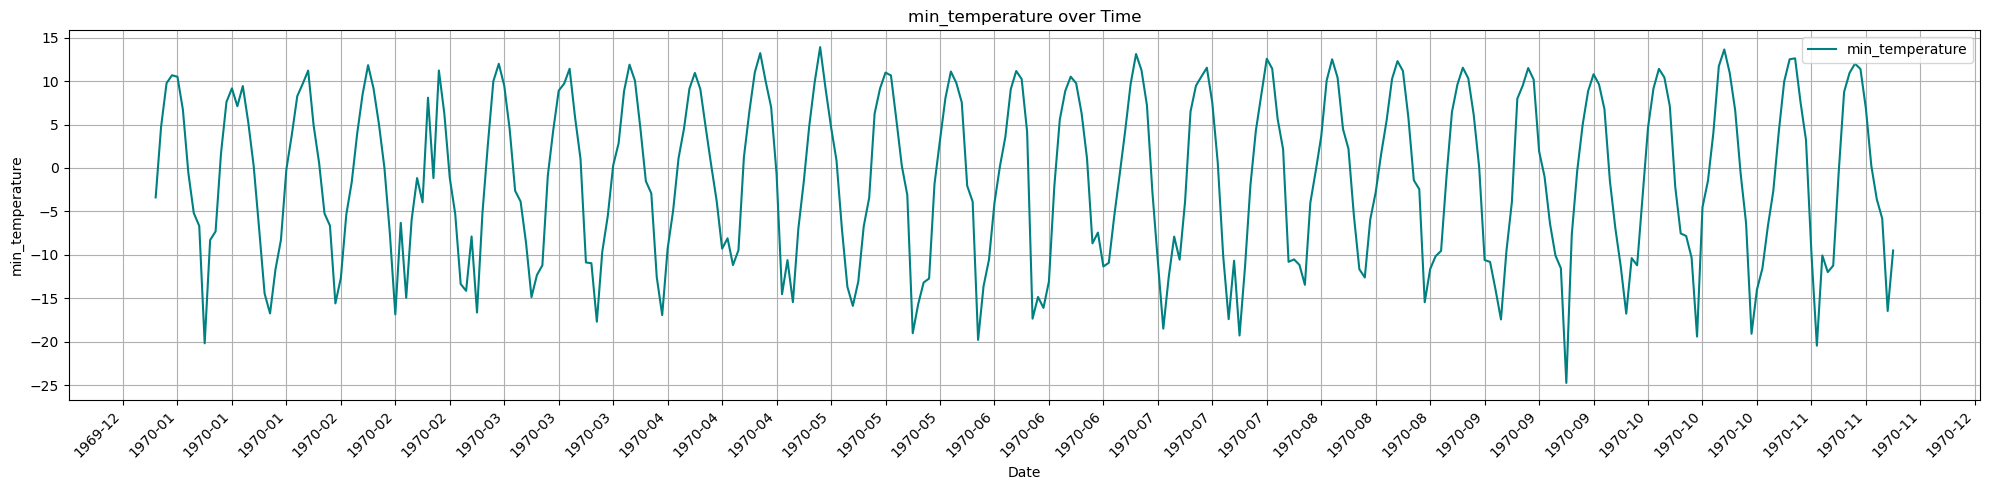

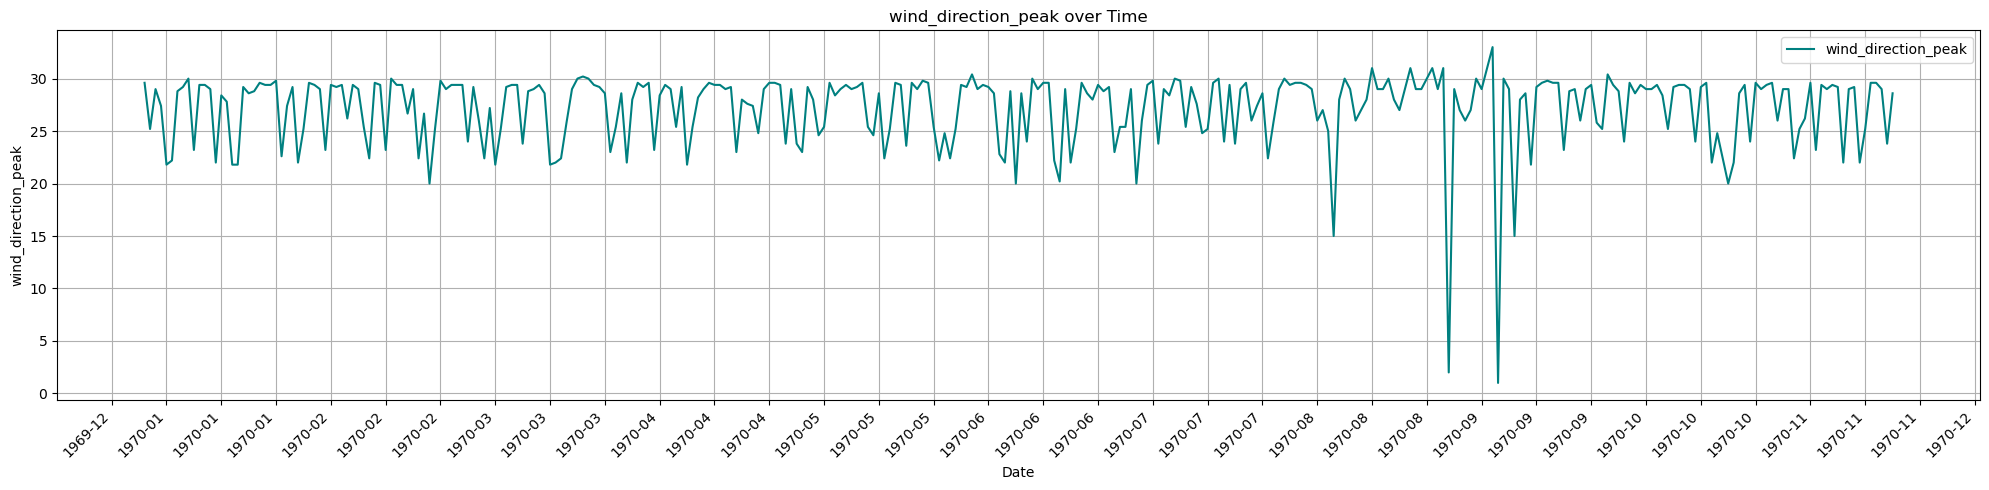

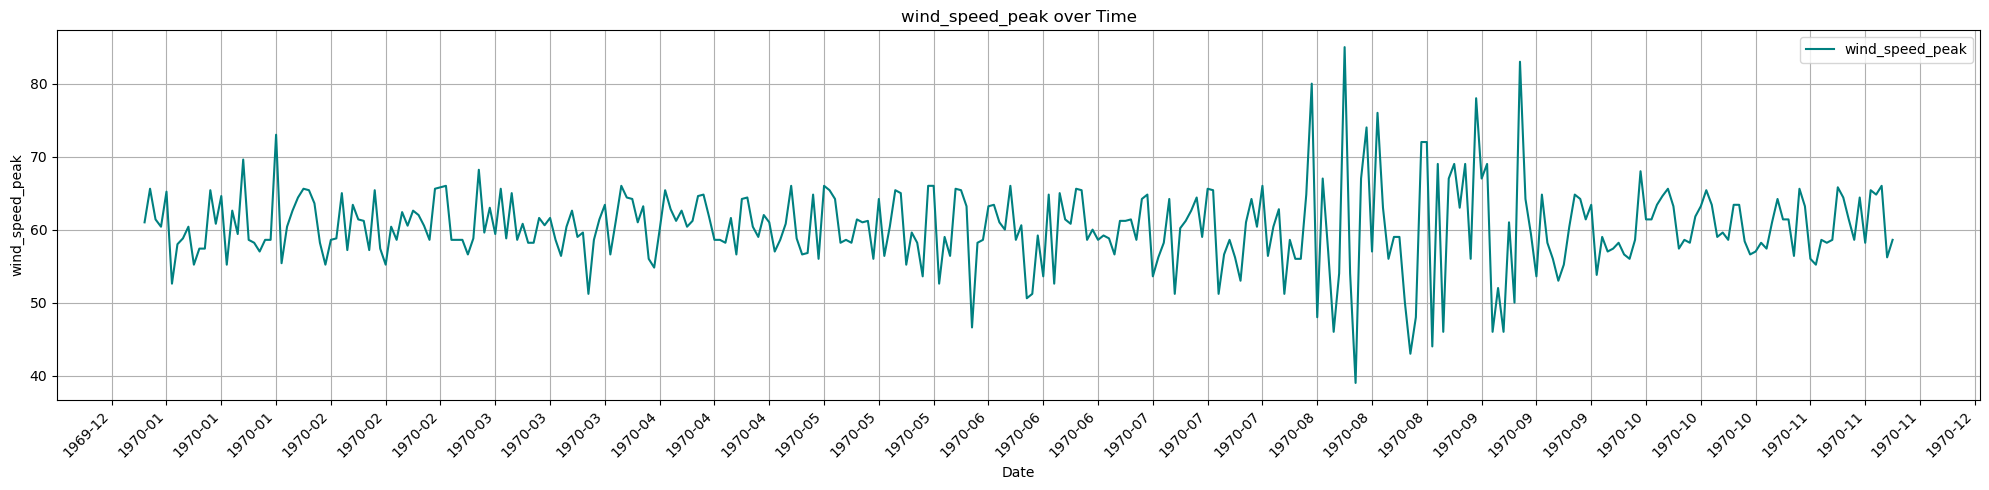

In [ ]:
for feature in rain_prediction_df_imputed.columns:
    if feature != 'date' and feature != 'station_id':  
        plt.figure(figsize=(20, 5))  
        plt.plot(rain_prediction_df_imputed['date'], rain_prediction_df_imputed[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

In [ ]:
rain_prediction_df_imputed = rain_prediction_df_imputed[
    (rain_prediction_df_imputed['total_precipitation'] <= 100) &
    (rain_prediction_df_imputed['wind_direction_peak'] >=15)&
    (rain_prediction_df_imputed['wind_speed_peak'] <= 80) & (rain_prediction_df_imputed['wind_speed_peak'] >= 45)&
    (rain_prediction_df_imputed['max_daily_precip'] <= 60)&
    (rain_prediction_df_imputed['days_precip_ge_0.01in'] <= 17.5) & (rain_prediction_df_imputed['days_precip_ge_0.01in'] >= 2.5)
]

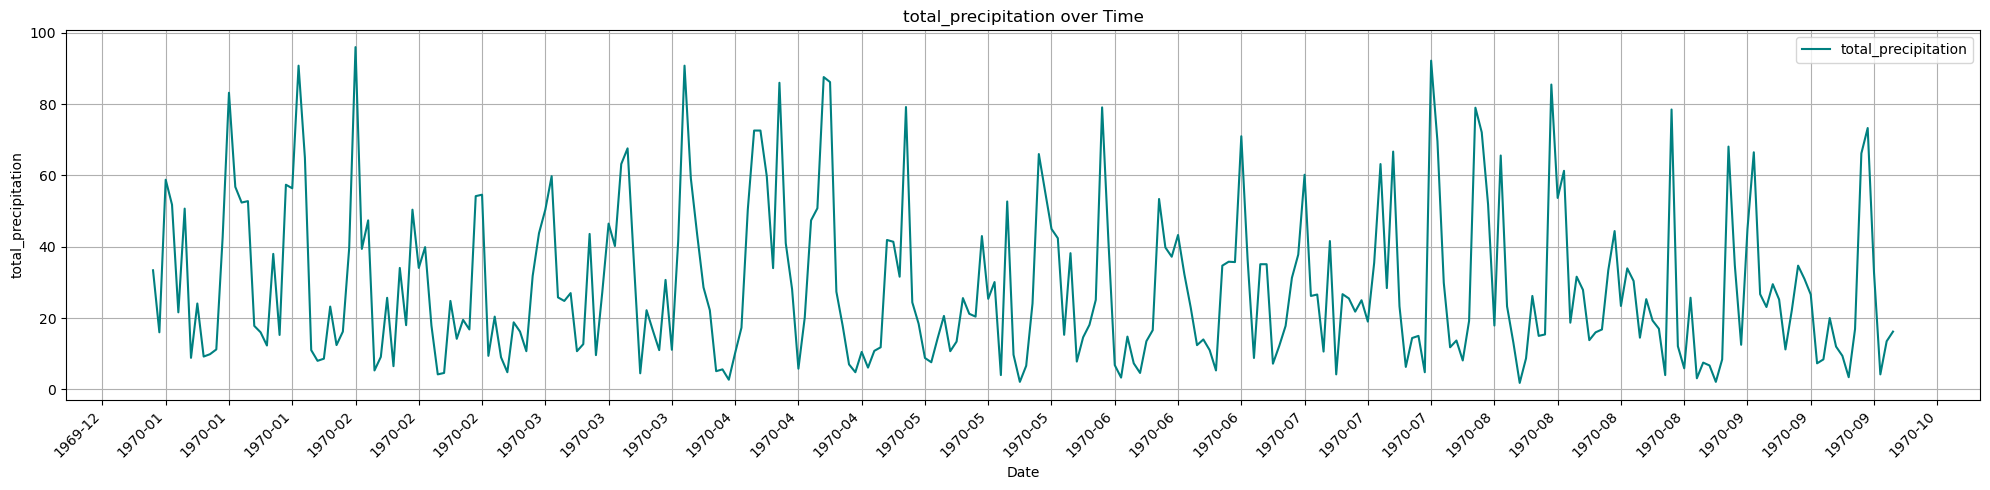

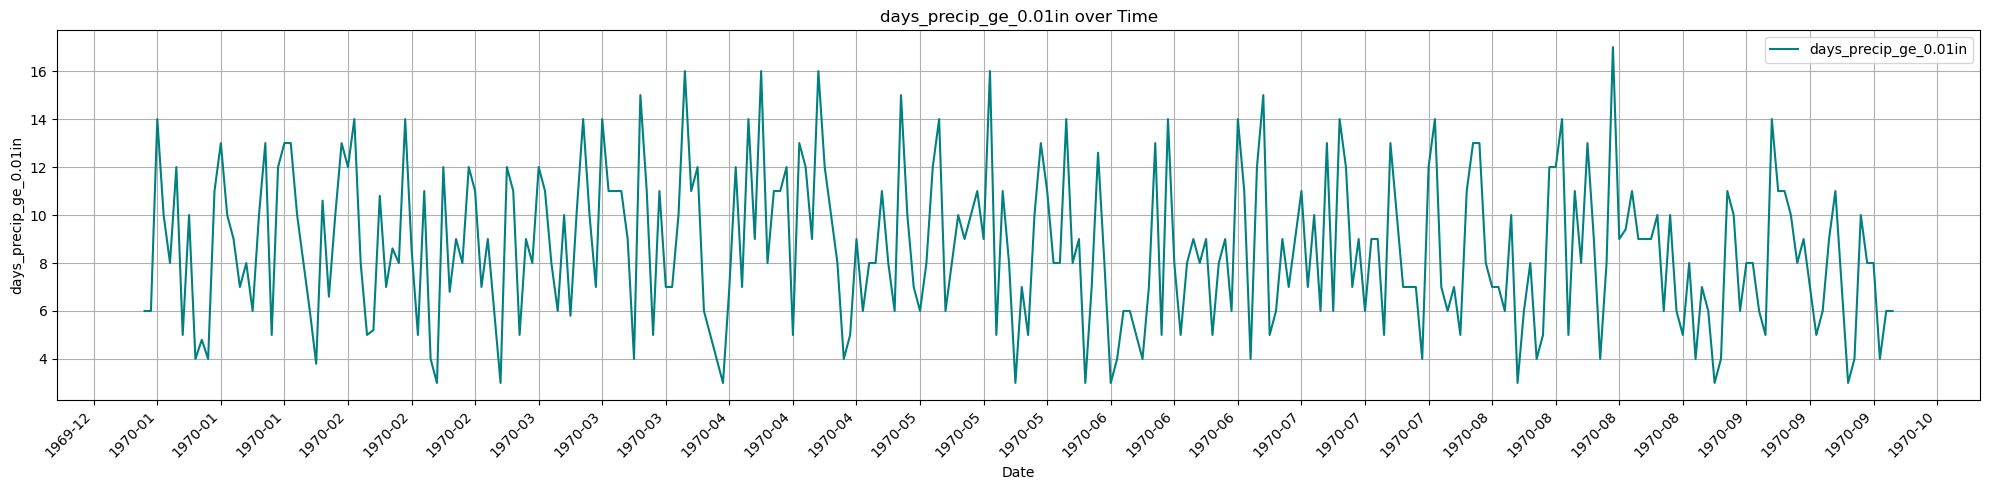

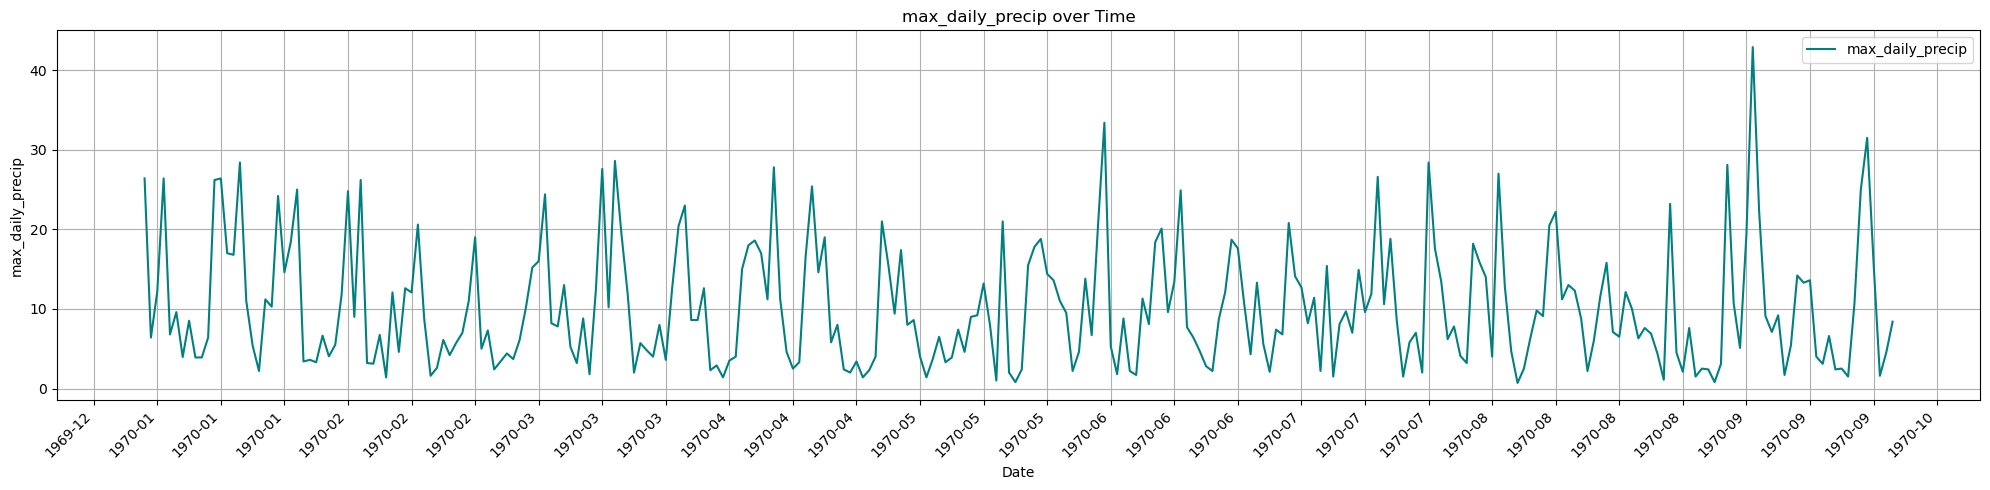

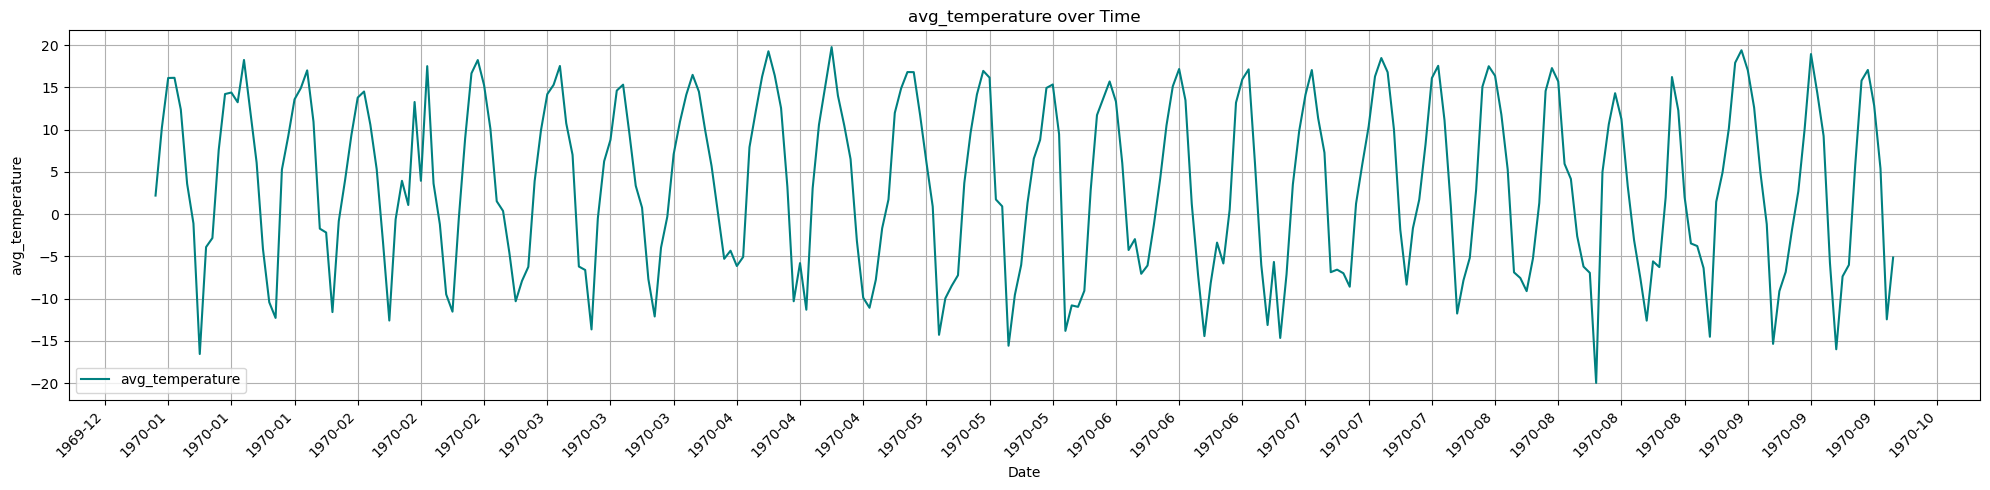

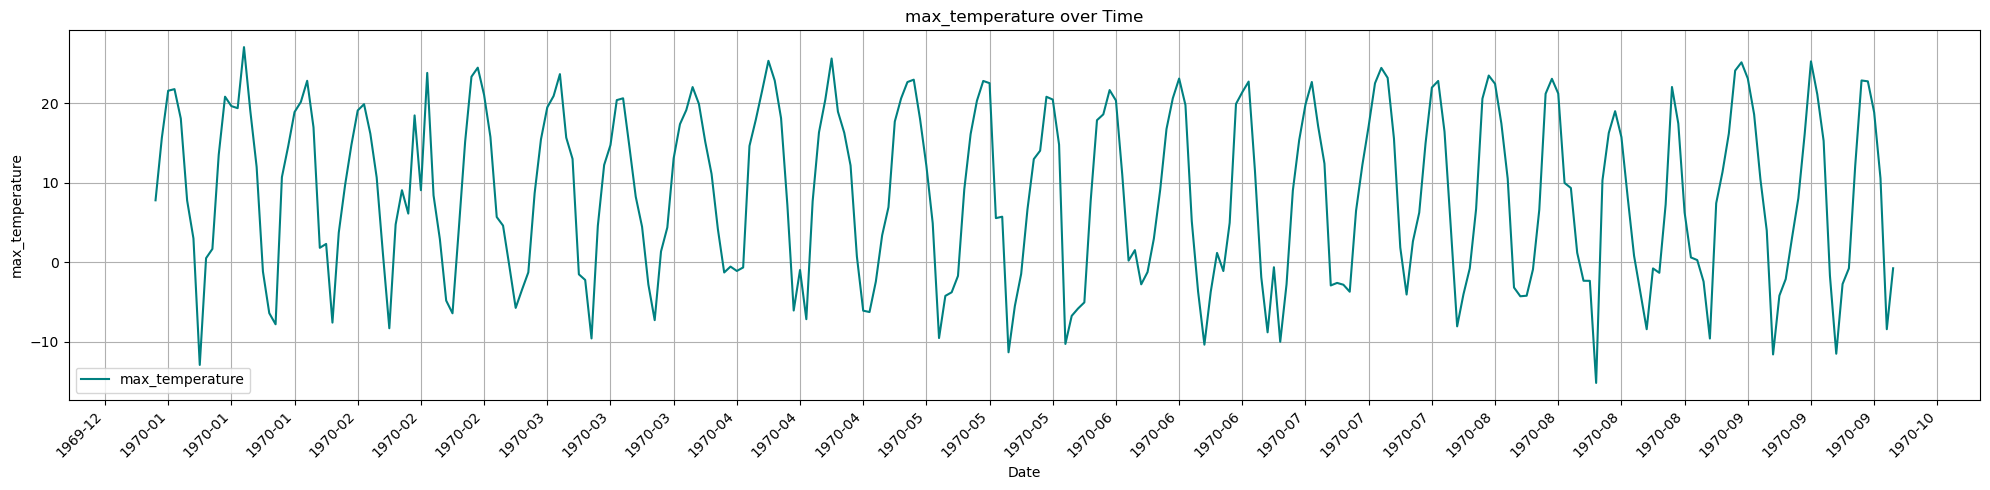

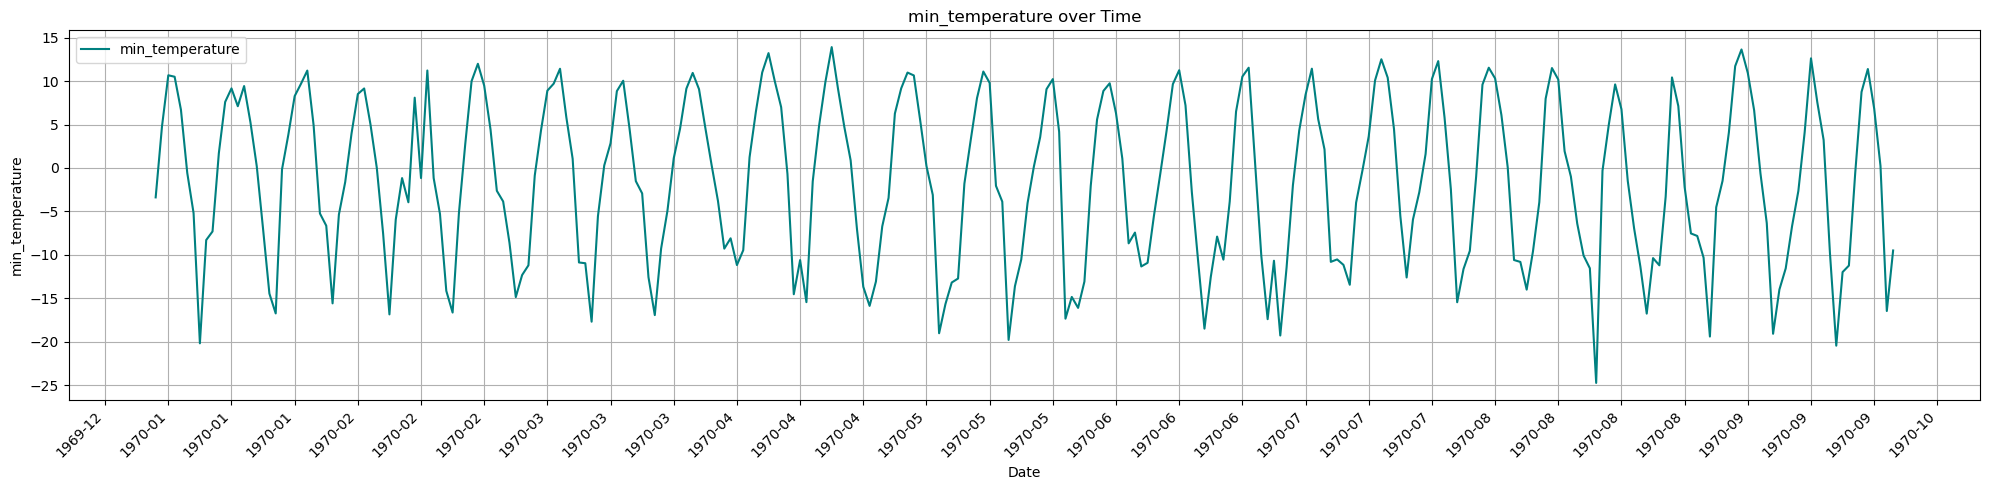

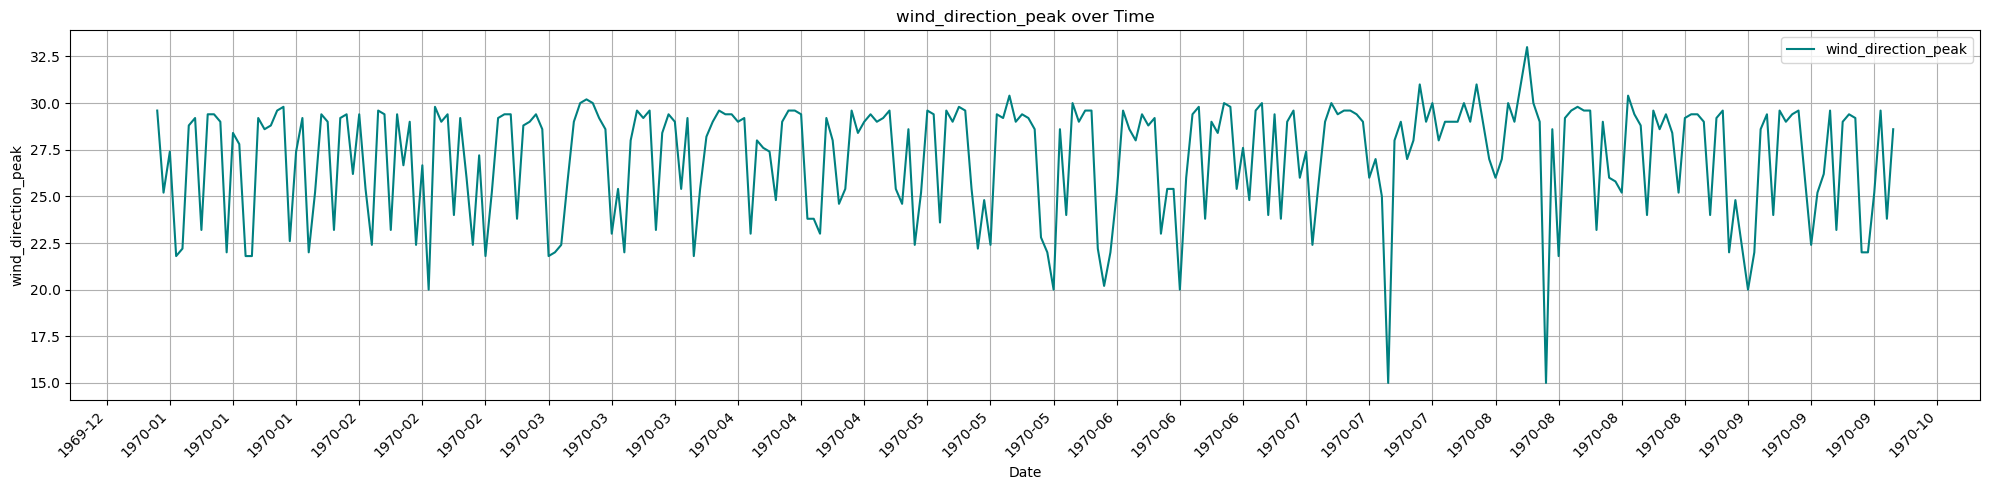

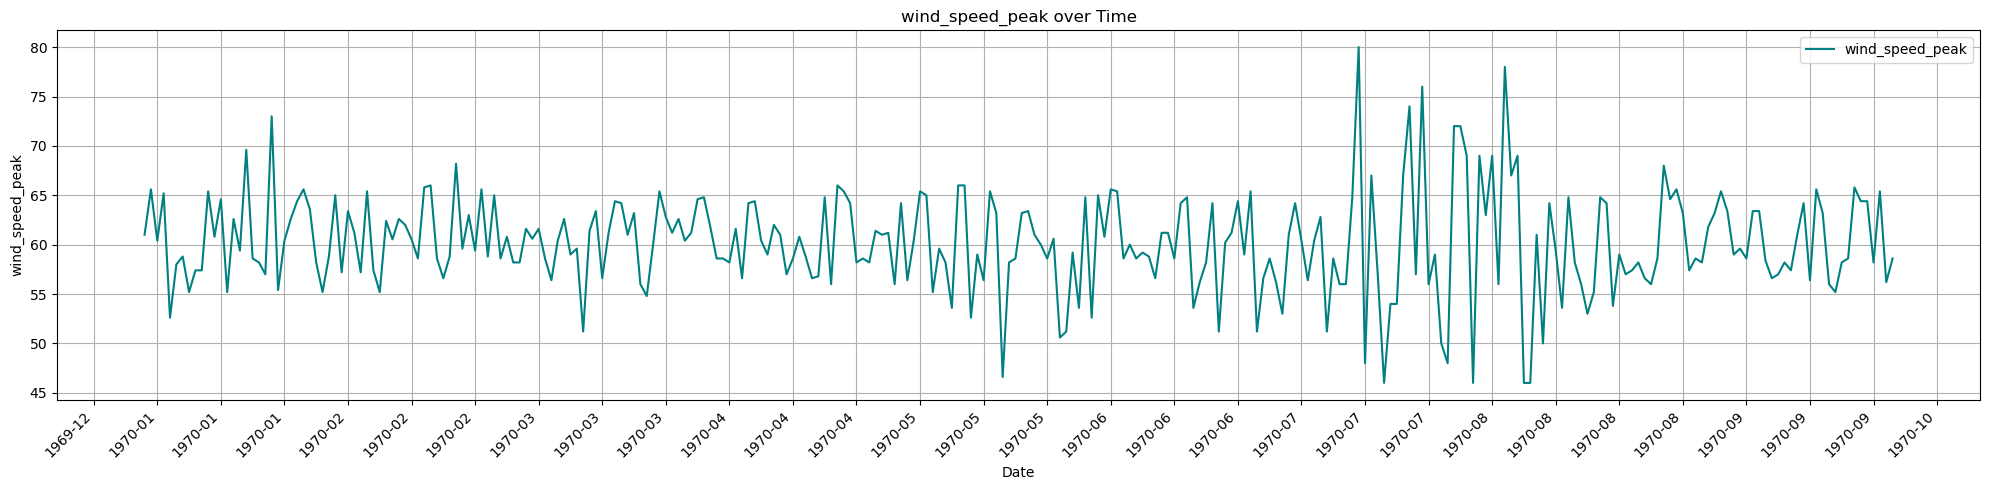

In [ ]:
for feature in rain_prediction_df_imputed.columns:
    if feature != 'date' and feature != 'station_id':  
        plt.figure(figsize=(20, 5))  
        plt.plot(rain_prediction_df_imputed['date'], rain_prediction_df_imputed[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

([<matplotlib.axis.XTick at 0x1a7bd43b2c0>,
 [Text(1, 0, 'total_precipitation'),
  Text(2, 0, 'days_precip_ge_0.01in'),
  Text(3, 0, 'max_daily_precip'),
  Text(4, 0, 'avg_temperature'),
  Text(5, 0, 'max_temperature'),
  Text(6, 0, 'min_temperature'),
  Text(7, 0, 'wind_direction_peak'),
  Text(8, 0, 'wind_speed_peak')])

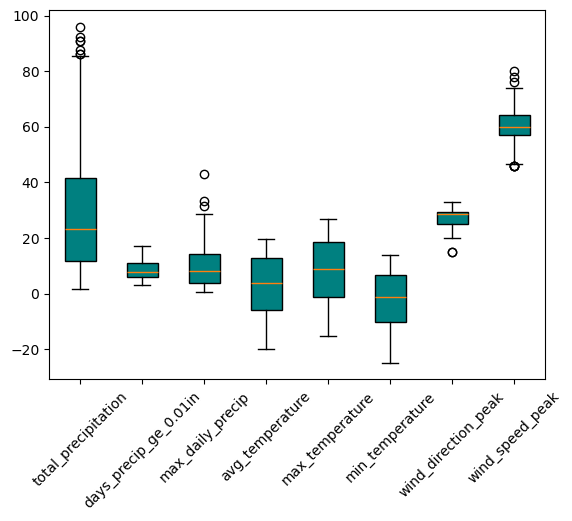

In [ ]:
features = [feature for feature in rain_prediction_df_imputed.columns if feature not in ['date', 'station_id']]

plt.boxplot([rain_prediction_df_imputed[feature] for feature in features], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(features) + 1), features, rotation=45)

In [ ]:
# Features to scale
features_to_scale = [
    'total_precipitation',
    'days_precip_ge_0.01in',
    'max_daily_precip',
    'avg_temperature',
    'max_temperature',
    'min_temperature',
    'wind_direction_peak',
    'wind_speed_peak'
]

df_2_scaled = rain_prediction_df_imputed.drop(columns=['station_id', 'date'])

# Fit and transform
df_2_scaled[features_to_scale] = scaler.fit_transform(df_2_scaled[features_to_scale])


([<matplotlib.axis.XTick at 0x1a7be89f770>,
 [Text(1, 0, 'total_precipitation'),
  Text(2, 0, 'days_precip_ge_0.01in'),
  Text(3, 0, 'max_daily_precip'),
  Text(4, 0, 'avg_temperature'),
  Text(5, 0, 'max_temperature'),
  Text(6, 0, 'min_temperature'),
  Text(7, 0, 'wind_direction_peak'),
  Text(8, 0, 'wind_speed_peak')])

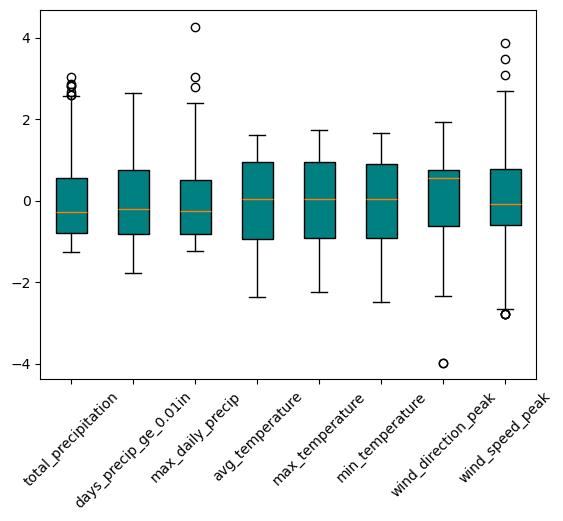

In [ ]:
features = [feature for feature in df_2_scaled.columns if feature not in ['date', 'station_id']]

plt.boxplot([df_2_scaled[feature] for feature in features], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(features) + 1), features, rotation=45)

In [ ]:
GSOM_CLEANED_DATA = df_scaled ##Cleaned and scaled (Station 1)
CA_CLEANED_DATA = df_2_scaled ##Cleaned and scaled (Station 2)

## Feature Engineering

In [ ]:
#creating a copy of both datasets 

df1_copy=df_scaled.copy()
df2_copy=df_2_scaled.copy()

In [ ]:
display( df1_copy.head(), df2_copy.head(5))

max_temperature  min_temperature  avg_temperature  avg_wind_speed  \
0         1.392744         1.169456         1.286007        0.114948   
1         1.236964         1.282419         1.265357       -0.942487   
2         1.054149         1.236207         1.149199       -0.846357   
3         0.102738        -0.124487        -0.011086       -0.029248   
4        -0.812626        -0.712410        -0.764820       -0.269574   

   total_precipitation  avg_dew_point  avg_relative_humidity  \
0            -0.401345       1.194481               0.489775   
1             0.224262       1.286233               0.665633   
2             0.694642       1.203630               1.149245   
3            -0.954042       0.042218              -0.653307   
4            -0.121468      -0.875829              -0.477449   

   avg_sea_level_pressure  
0               -0.821747  
1               -1.170768  
2               -0.739625  
3               -0.462461  
4                0.954154

total_precipitation  days_precip_ge_0.01in  max_daily_precip  \
0             0.191182              -0.826905          2.117043   
1            -0.603313              -0.826905         -0.497879   
3             1.350962               1.702562          0.260448   
4             1.031338               0.437829          2.117043   
5            -0.347613              -0.194538         -0.445580   

   avg_temperature  max_temperature  min_temperature  wind_direction_peak  \
0        -0.137186        -0.083891        -0.197049             0.822816   
1         0.667394         0.657517         0.676113            -0.622687   
3         1.260030         1.214989         1.307444             0.100065   
4         1.262039         1.233854         1.289253            -1.739666   
5         0.885363         0.884845         0.882634            -1.608257   

   wind_speed_peak  
0         0.157793  
1         1.058887  
3         0.040259  
4         0.980531  
5        -1.487683

In [ ]:
# Drop unnecessary columns
df1_copy = df1_copy.drop(columns=['avg_wind_speed', 'avg_sea_level_pressure'])

# Check the DataFrame after dropping the columns
df1_copy.head()


max_temperature  min_temperature  avg_temperature  total_precipitation  \
0         1.392744         1.169456         1.286007            -0.401345   
1         1.236964         1.282419         1.265357             0.224262   
2         1.054149         1.236207         1.149199             0.694642   
3         0.102738        -0.124487        -0.011086            -0.954042   
4        -0.812626        -0.712410        -0.764820            -0.121468   

   avg_dew_point  avg_relative_humidity  
0       1.194481               0.489775  
1       1.286233               0.665633  
2       1.203630               1.149245  
3       0.042218              -0.653307  
4      -0.875829              -0.477449

In [ ]:
# Calculating Daily & Humidity–Temperature Interactions
# Station 1
df1_copy['temp_range']  = df1_copy['max_temperature'] - df1_copy['min_temperature']
df1_copy['dew_deficit'] = df1_copy['avg_temperature'] - df1_copy['avg_dew_point']
#approximate "Feels-like" temp
df1_copy['heat_index']  = (
      -42.379
    +  2.04901523 * df1_copy['avg_temperature']
    + 10.14333127 * df1_copy['avg_relative_humidity']
    -  0.22475541 * df1_copy['avg_temperature'] * df1_copy['avg_relative_humidity']
)

# Station 2 (no dew_point/humidity columns)
df2_copy['temp_range'] = df2_copy['max_temperature'] - df2_copy['min_temperature']


In [ ]:
#Precipitation flags and dry‑day streaks

for df in (df1_copy, df2_copy):
    df['precip_flag'] = (df['total_precipitation'] > 0).astype(int)
    streak = []
    count = 0
    for flag in df['precip_flag']:
        count = count + 1 if flag == 0 else 0
        streak.append(count)
    df['dry_streak'] = streak

In [ ]:
# PCA‑based dimensionality reduction
# condenses many related columns into fewer columns

# Station 1: compress temps/dew/humidity/pressure into one PC
pca_temp       = PCA(n_components=1)
temp_feats_1   = [
    'max_temperature','min_temperature','avg_temperature',
    'avg_dew_point'
]
df1_copy['temp_pca1'] = pca_temp.fit_transform(df1_copy[temp_feats_1])

# Station 2: compress precipitation vars into one PC
pca_precip       = PCA(n_components=1)
precip_feats_2   = ['total_precipitation','days_precip_ge_0.01in','max_daily_precip']
df2_copy['precip_pca1'] = pca_precip.fit_transform(df2_copy[precip_feats_2])


In [ ]:
#verify the changes 
display(df1_copy.head(), df2_copy.head())


max_temperature  min_temperature  avg_temperature  total_precipitation  \
0         1.392744         1.169456         1.286007            -0.401345   
1         1.236964         1.282419         1.265357             0.224262   
2         1.054149         1.236207         1.149199             0.694642   
3         0.102738        -0.124487        -0.011086            -0.954042   
4        -0.812626        -0.712410        -0.764820            -0.121468   

   avg_dew_point  avg_relative_humidity  temp_range  dew_deficit  heat_index  \
0       1.194481               0.489775    0.223288     0.091526  -34.917569   
1       1.286233               0.665633   -0.045455    -0.020876  -33.223828   
2       1.203630               1.149245   -0.182058    -0.054431  -28.663938   
3       0.042218              -0.653307    0.227225    -0.053304  -49.030056   
4      -0.875829              -0.477449   -0.100216     0.111009  -48.871118   

   precip_flag  dry_streak  temp_pca1  
0            0           1   2.521448  
1            1           0   2.535420  
2            1           0   2.321526  
3            0           1   0.004316  
4            0           2  -1.582352

total_precipitation  days_precip_ge_0.01in  max_daily_precip  \
0             0.191182              -0.826905          2.117043   
1            -0.603313              -0.826905         -0.497879   
3             1.350962               1.702562          0.260448   
4             1.031338               0.437829          2.117043   
5            -0.347613              -0.194538         -0.445580   

   avg_temperature  max_temperature  min_temperature  wind_direction_peak  \
0        -0.137186        -0.083891        -0.197049             0.822816   
1         0.667394         0.657517         0.676113            -0.622687   
3         1.260030         1.214989         1.307444             0.100065   
4         1.262039         1.233854         1.289253            -1.739666   
5         0.885363         0.884845         0.882634            -1.608257   

   wind_speed_peak  temp_range  precip_flag  dry_streak  precip_pca1  
0         0.157793    0.113158            1           0     0.935624  
1         1.058887   -0.018596            0           1    -1.089982  
3         0.040259   -0.092456            1           0     1.871885  
4         0.980531   -0.055399            1           0     2.108798  
5        -1.487683    0.002212            0           1    -0.579149

## Modleling  for Station 1

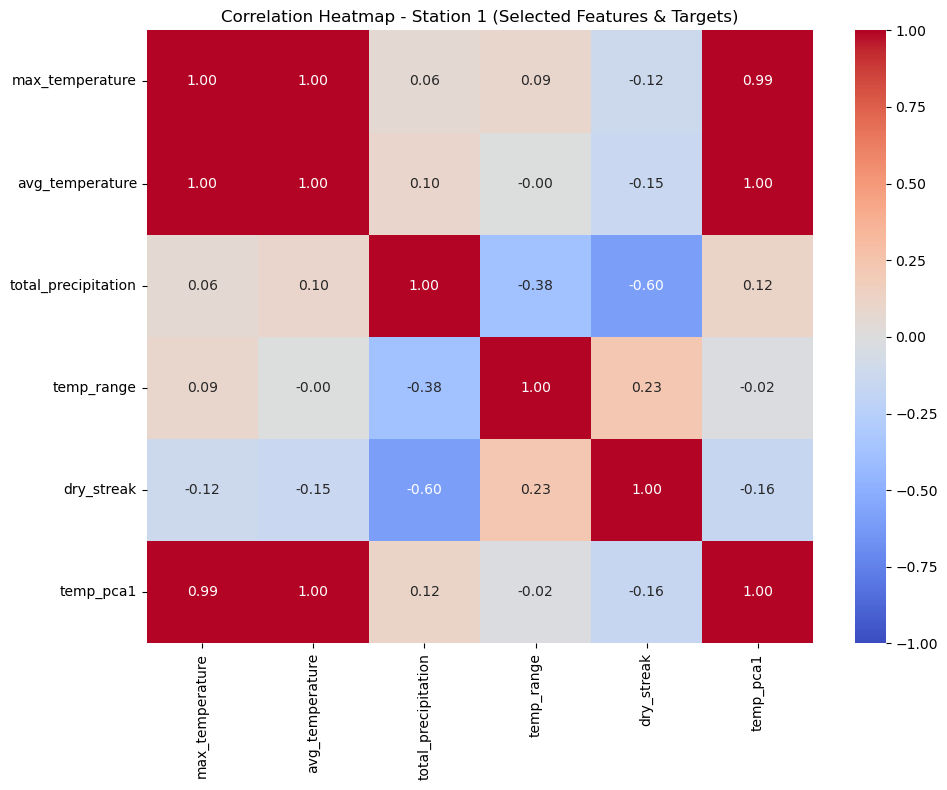

In [ ]:
# Filter only relevant features
selected_columns = [
    'max_temperature',
    'avg_temperature',
    'total_precipitation',  # Potential target
    'temp_range',
    'dry_streak',
    'temp_pca1'
]

# Filter the dataframe
station1_selected = df1_copy[selected_columns]

# Compute correlation matrix
corr_matrix = station1_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Station 1 (Selected Features & Targets)")
plt.tight_layout()
plt.show()


In [ ]:
#Define features and outputs
y = df1_copy[['avg_temperature', 'total_precipitation']]
X = df1_copy.drop(columns=['avg_temperature', 'total_precipitation'])


# Fit the scaler to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

 # Convert scaled data back to a DataFrame
X_scaled = pd.DataFrame(scaled_features, columns=X.columns)



#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Ensure y_train and y_test are multi-dimensional (multi-output regression)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)   

y_train shape: (712, 2)
y_test shape: (178, 2)


We have chosen the `average temperature` and `total precipitation` as our targets. The following modeling appraoches were selected to suppoprt our Multi-Output Model: 

1. Random Forest Regressor (Ensemble Tree-Based)
2. MultiOutputRegressor with Support Vector Regressor (SVR)
3. Multi-Layer Perceptron Regressor (Neural Network)-station 1 only
4. ARIMA-station 2 only


In [ ]:
# Dictionary to store model performances
model_performances1 = {}

#Model 1: Tuning random forest regressor

#Define the parameter grid for random forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=80),
    param_distributions=rf_param_grid,
    n_iter=15,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)
#fit the model
rf_random.fit(X_train, y_train)
rf_model = rf_random.best_estimator_
y_pred_rf = rf_model.predict(X_test)

model_performances1['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Model 2: Tuning SVR (wrapped in MultiOutputRegressor)

#Define the parameter grid for SVR
svr_param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__kernel': ['rbf', 'linear']
}

# MultiOutputRegressor with SVR
svr_model = MultiOutputRegressor(SVR())
svr_random = RandomizedSearchCV(
    svr_model,
    param_distributions=svr_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model (y_train and y_test are already in the correct shape)
svr_random.fit(X_train, y_train)
best_svr_model = svr_random.best_estimator_

# Predict on test data
y_pred_svr = best_svr_model.predict(X_test)

model_performances1['SVR (MultiOutput)'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

#Model 3 : 
#Define the parameter grid for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random = RandomizedSearchCV(
    MLPRegressor(max_iter=500, random_state=80),
    param_distributions=mlp_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)
#fit the model
mlp_random.fit(X_train, y_train)
mlp_model = mlp_random.best_estimator_
y_pred_mlp = mlp_model.predict(X_test)

model_performances1['MLP Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_mlp),
    'MAE': mean_absolute_error(y_test, y_pred_mlp),
    'R2': r2_score(y_test, y_pred_mlp)
}


In [ ]:
list(X_train.columns)

['max_temperature',
 'min_temperature',
 'avg_dew_point',
 'avg_relative_humidity',
 'temp_range',
 'dew_deficit',
 'heat_index',
 'precip_flag',
 'dry_streak',
 'temp_pca1']

Since we are working with multi-output regression, we use these metrics to measure performance:
- Mean Squared Error (MSE)

- Mean Absolute Error (MAE)

- R² Score (Coefficient of Determination) 

In [ ]:
# Display the metrics for each model
perf_df1 = pd.DataFrame(model_performances1).T
print("Model Performance Metrics:\n")
print(perf_df1.round(4))

Model Performance Metrics:

                      MSE     MAE      R2
Random Forest      0.1120  0.1949  0.9075
SVR (MultiOutput)  0.1318  0.2191  0.8908
MLP Regressor      0.1152  0.2063  0.9048


C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\574227666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df1.index, y=perf_df1[metric].values, ax=axes[i], palette=colors)
C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\574227666.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(perf_df1.index, rotation=45)
C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\574227666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df1.index, y=perf_df1[metric].values, ax=axes[i], palette=colors)
C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\574227666.py:12: UserWar

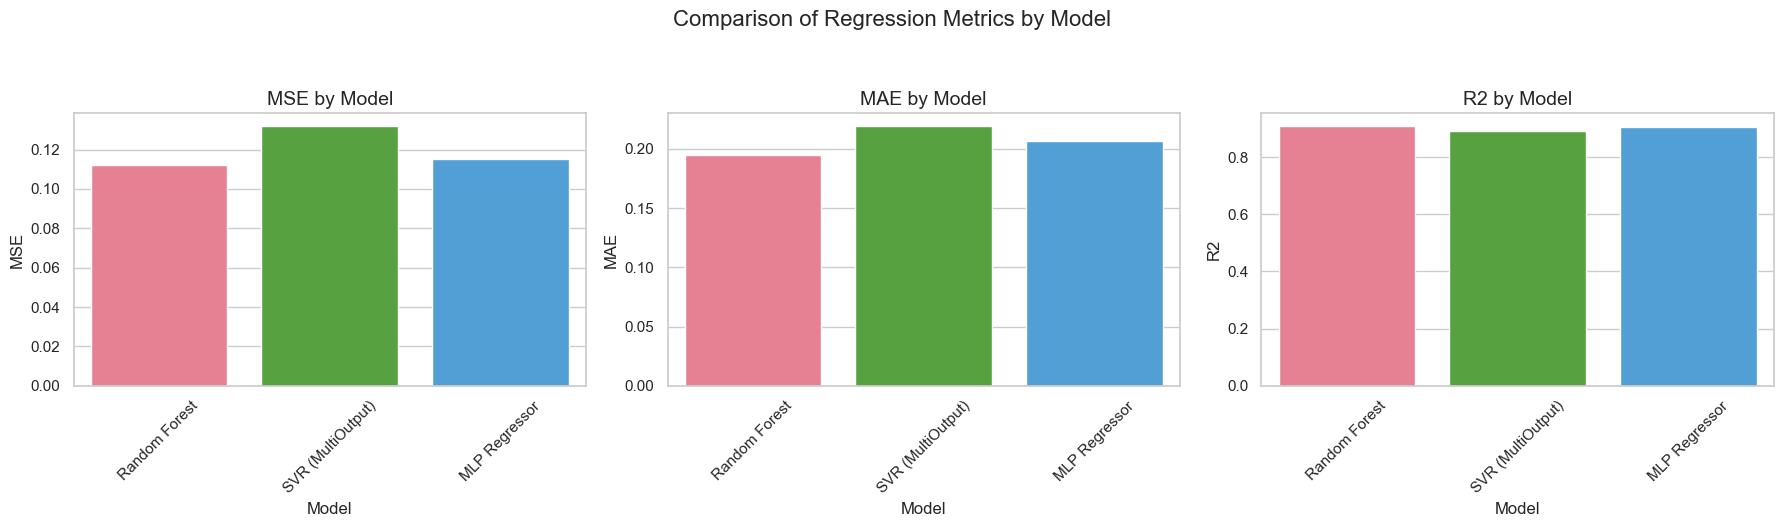

In [ ]:
# Visualizing the performance metrics
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(perf_df1))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, metric in enumerate(['MSE', 'MAE', 'R2']):
    sns.barplot(x=perf_df1.index, y=perf_df1[metric].values, ax=axes[i], palette=colors)
    axes[i].set_title(f'{metric} by Model', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].set_xticklabels(perf_df1.index, rotation=45)

plt.suptitle('Comparison of Regression Metrics by Model', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

## Summary of Model Performance for station 1:

Random Forest: Best overall performance with the lowest MSE and MAE, and the highest R2.

SVR (MultiOutput): Good performance but not as strong as Random Forest, with higher MSE and MAE, and a slightly lower R2.

MLP Regressor: Close performance to Random Forest, with slightly higher MSE and MAE, and a slightly lower R2.

Given these metrics, the Random Forest model is the best choice for the data.

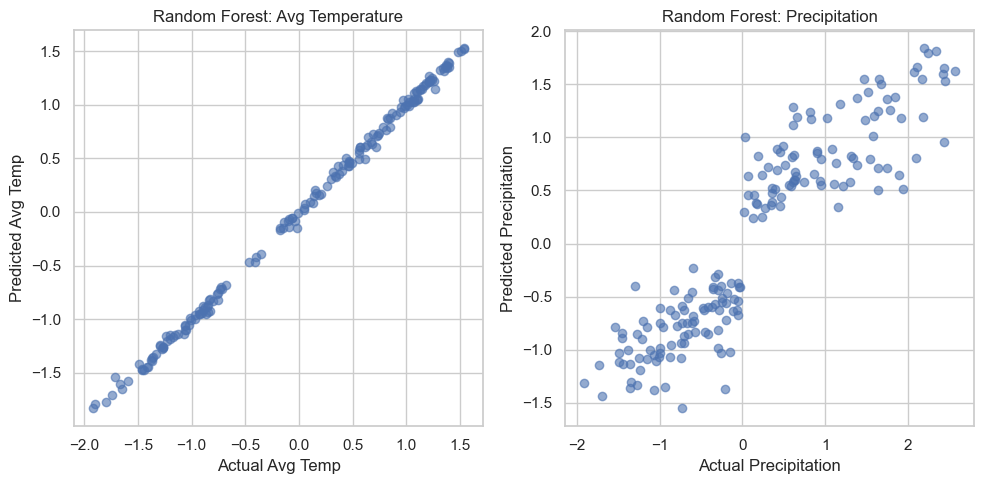

In [ ]:
# Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 5))

# Plot for avg_temperature
plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[:, 0], y_pred_rf[:, 0], alpha=0.6)
plt.xlabel("Actual Avg Temp")
plt.ylabel("Predicted Avg Temp")
plt.title("Random Forest: Avg Temperature")

# Plot for total_precipitation
plt.subplot(1, 2, 2)
plt.scatter(y_test.iloc[:, 1], y_pred_rf[:, 1], alpha=0.6)
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Random Forest: Precipitation")

plt.tight_layout()
plt.show()


Save the best model in station1_model.pkl

In [ ]:
import os
import pickle

relative_path = r'../artifacts/station1_model.pkl'

# Ensure the directory exists
os.makedirs(os.path.dirname(relative_path), exist_ok=True)


best_model_station1 = rf_model  

# Save Station 1 model
station1_data = {
    'model': best_model_station1,
    'scaler': scaler,  
    'feature_names': list(X_train.columns)
}

with open(relative_path, 'wb') as f:
    pickle.dump(station1_data, f)

print(f"Station 1 model saved successfully to {relative_path}.")


Station 1 model saved successfully to ../artifacts/station1_model.pkl.


## Modeling for Station 2 

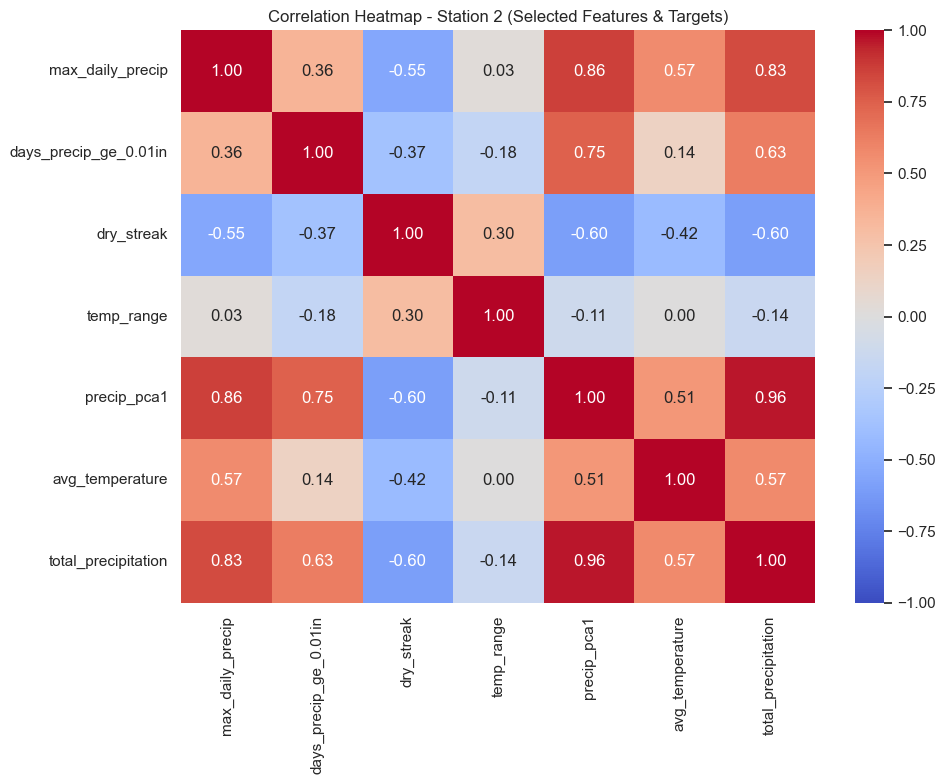

In [ ]:
# Ensure we are only working with numeric data
numeric_df = df2_copy.select_dtypes(include=['float64', 'int64'])

selected_columns = [
    'max_daily_precip',
    'days_precip_ge_0.01in',
    'dry_streak',
    'temp_range',
    'precip_pca1',
    'avg_temperature',
    'total_precipitation'
]

# Filter dataframe
station1_selected = df2_copy[selected_columns]

# Compute correlation matrix
corr_matrix = station1_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Station 2 (Selected Features & Targets)")
plt.tight_layout()
plt.show()

In [ ]:
#Define features and outputs
y2 = df2_copy[['avg_temperature', 'total_precipitation']]
X2 = df2_copy.drop(columns=['avg_temperature', 'total_precipitation'])


# Fit the scaler to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X2)

 # Convert scaled data back to a DataFrame
X2_scaled = pd.DataFrame(scaled_features, columns=X2.columns)


In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X2_scaled, y2, test_size=0.2, random_state=42
)

In [ ]:
# Ensure y_train and y_test are multi-dimensional (multi-output regression)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)    

y_train shape: (220, 2)
y_test shape: (56, 2)


In [ ]:
# Dictionary to store model performances
model_performances2 = {}

# Model 1: Tuning random forest regressor
# Define the parameter grid for random forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=80),
    param_distributions=rf_param_grid,
    n_iter=15,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model
rf_random.fit(X_train, y_train)
rf_model = rf_random.best_estimator_
y_pred_rf = rf_model.predict(X_test)

model_performances2['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Model 2: Tuning SVR (wrapped in MultiOutputRegressor)
# Define the parameter grid for SVR
svr_param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__kernel': ['rbf', 'linear']
}

# MultiOutputRegressor with SVR
svr_model = MultiOutputRegressor(SVR())
svr_random = RandomizedSearchCV(
    svr_model,
    param_distributions=svr_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model (y_train and y_test are already in the correct shape)
svr_random.fit(X_train, y_train)
best_svr_model = svr_random.best_estimator_

# Predict on test data
y_pred_svr = best_svr_model.predict(X_test)

model_performances2['SVR (MultiOutput)'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

#Model 3 MLP: 
#Define the parameter grid for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random = RandomizedSearchCV(
    MLPRegressor(max_iter=500, random_state=80),
    param_distributions=mlp_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)
#fit the model
mlp_random.fit(X_train, y_train)
mlp_model = mlp_random.best_estimator_
y_pred_mlp = mlp_model.predict(X_test)

model_performances2['MLP Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_mlp),
    'MAE': mean_absolute_error(y_test, y_pred_mlp),
    'R2': r2_score(y_test, y_pred_mlp)
}

In [ ]:
# Display the metrics for each model
perf_df2 = pd.DataFrame(model_performances2).T
print("Model Performance Metrics:\n")
print(perf_df2.round(4))

Model Performance Metrics:

                      MSE     MAE      R2
Random Forest      0.0180  0.0894  0.9805
SVR (MultiOutput)  0.0000  0.0037  1.0000
MLP Regressor      0.0002  0.0092  0.9998


C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\3806581533.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df2.index, y=perf_df2[metric].values, ax=axes[i], palette=colors)
C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\3806581533.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(perf_df2.index, rotation=45)
C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\3806581533.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df2.index, y=perf_df2[metric].values, ax=axes[i], palette=colors)
C:\Users\Caitlin\AppData\Local\Temp\ipykernel_5832\3806581533.py:13: Use

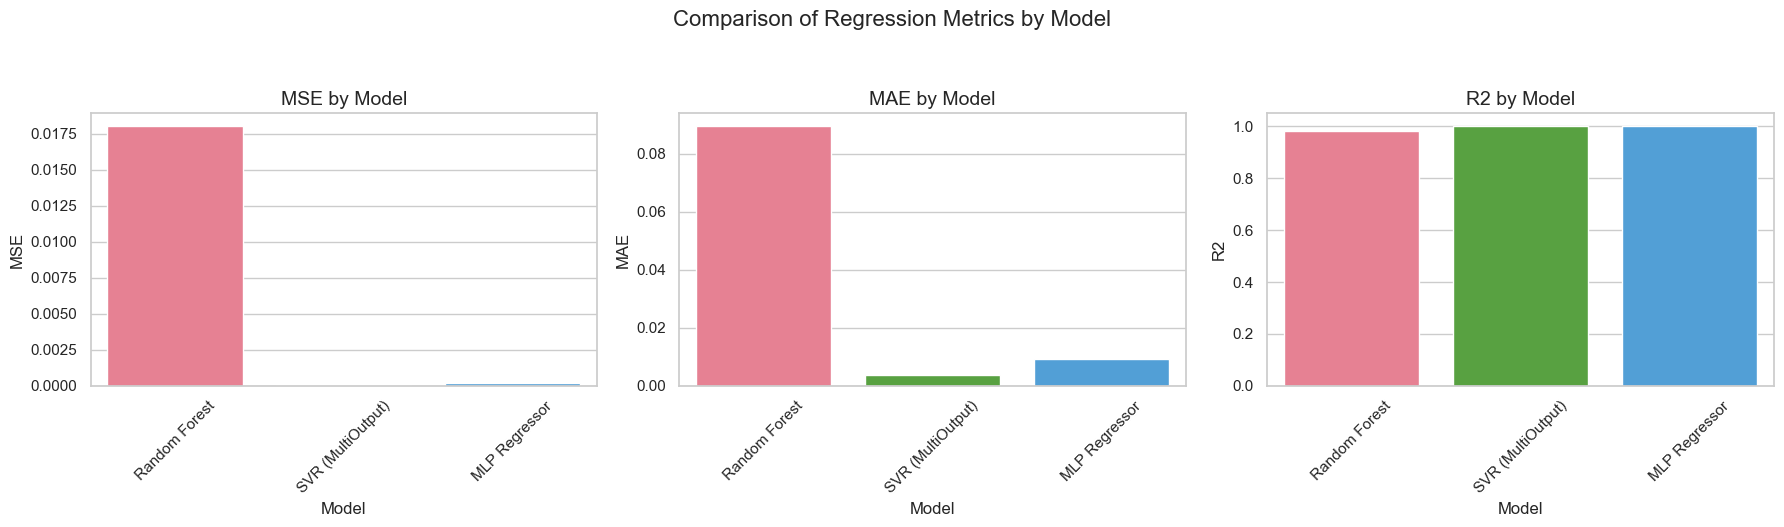

In [ ]:
# Visualizing the performance metrics
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(perf_df2))


fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, metric in enumerate(['MSE', 'MAE', 'R2']):
    sns.barplot(x=perf_df2.index, y=perf_df2[metric].values, ax=axes[i], palette=colors)
    axes[i].set_title(f'{metric} by Model', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].set_xticklabels(perf_df2.index, rotation=45)


plt.suptitle('Comparison of Regression Metrics by Model', fontsize=16, y=1.05)


plt.tight_layout()
plt.show()

## Summary of Model Performance for station 2:

SVR (MultiOutput): Best overall performance with the lowest MSE and MAE, and the highest R2.

MLP Regressor: Very close performance to SVR, with slightly higher MSE and MAE, and an R2 value of 0.9999.

Random Forest: Good performance but not as strong as SVR and MLP, with higher MSE and MAE, and a slightly lower R2.

Given these metrics, the SVR (MultiOutput) model is the best choice for the data. 

Save the best model in station2_model.pkl

In [ ]:
import os
import pickle

relative_path = r'../artifacts/station2_model.pkl'

os.makedirs(os.path.dirname(relative_path), exist_ok=True)

best_model_station2 = best_svr_model  

# Save Station 2 model
station2_data = {
    'model': best_model_station2,
    'scaler': scaler, 
    'feature_names': list(X_train.columns)
}

with open(relative_path, 'wb') as f:
    pickle.dump(station1_data, f)

print(f"Station 2 model saved successfully to {relative_path}.")


Station 2 model saved successfully to ../artifacts/station2_model.pkl.
